In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from joblib import dump, load
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-college-student-loan-repayment-2009-2013/collegescorecard_ml_dataset.csv


In [2]:
# To display all columns in full
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/kaggle/input/us-college-student-loan-repayment-2009-2013/collegescorecard_ml_dataset.csv', sep=',', header=0, skiprows=0, low_memory=False)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opeid6                       37835 non-null  int64  
 1   UGDS                         34689 non-null  float64
 2   RPY_1YR_RT                   19559 non-null  object 
 3   RPY_3YR_RT                   32192 non-null  object 
 4   RPY_5YR_RT                   19107 non-null  object 
 5   RPY_7YR_RT                   6275 non-null   object 
 6   FEMALE_RPY_3YR_RT_SUPP       32294 non-null  object 
 7   MALE_RPY_3YR_RT_SUPP         32294 non-null  object 
 8   FIRSTGEN_RPY_3YR_RT_SUPP     32294 non-null  object 
 9   NOTFIRSTGEN_RPY_3YR_RT_SUPP  32294 non-null  object 
 10  Year                         37835 non-null  int64  
 11  INC_PCT_LO                   37070 non-null  object 
 12  INC_PCT_M1                   37070 non-null  object 
 13  INC_PCT_M2      

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3
0,1002,4483.0,0.376887340302,0.567427832831,NaN,NaN,0.606909430439,0.518093556929,0.558441558442,0.569518716578,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.6877,0.5000,NaN,NaN,18975,26477,15204,0.2875,NaN,0.5011618733406,0.56410259008407,0.64893615245819,0.108,NaN
1,1052,10265.0,0.764052741152,0.796605209248,NaN,NaN,0.802637776731,0.783807829181,0.807363013699,0.804031354983,2009,0.441437445,0.156832298,0.16393079,0.139307897,0.098491571,0.8156,0.5667,NaN,NaN,15000,18500,11625,0.3958,NaN,0.67904233932495,0.73492562770843,0.76438468694686,0.034,NaN
2,25034,389.0,0.579591836735,0.754448398577,NaN,NaN,0.742424242424,0.760273972603,0.783783783784,0.745762711864,2009,0.629746835,0.193037975,0.107594937,PrivacySuppressed,PrivacySuppressed,1.0000,1.0000,NaN,NaN,13834,17717,12500,0.0000,NaN,0.65454542636871,0.69822484254837,0.70093458890914,0.064,NaN
3,1055,5956.0,0.784353741497,0.84561891516,NaN,NaN,0.856760374833,0.84,0.834745762712,0.856429463171,2009,0.448127925,0.145865835,0.149375975,0.143915757,0.112714509,0.7556,0.4516,NaN,NaN,13323,18750,10250,0.4755,NaN,0.70609980821609,0.78464418649673,0.77847534418106,0.040,NaN
4,1005,4638.0,0.285774234159,0.497953107555,NaN,NaN,0.54440433213,0.43867120954,0.485592315902,0.517810599479,2009,0.66460177,0.163716814,0.096460177,0.049557522,0.025663717,0.5335,0.2653,NaN,NaN,13921,29433,13224,0.2174,NaN,0.40065789222717,0.52383720874786,0.56045949459075,0.158,NaN
5,1051,23296.0,0.808405116158,0.839340597932,NaN,NaN,0.845123258307,0.833753148615,0.841754051478,0.847127996382,2009,0.313469179,0.13084711,0.151095732,0.178136614,0.226451365,0.8349,0.4878,NaN,NaN,15375,18500,11250,0.6593,NaN,0.69420635700225,0.75937682390213,0.77460986375808,0.033,NaN
6,1007,2288.0,0.494475138122,0.575528700906,NaN,NaN,0.56394129979,0.602564102564,0.588235294118,0.654761904762,2009,0.748913044,0.129347826,0.072826087,0.039673913,0.00923913,NaN,NaN,0.3161,0.48,7971,12651,7500,NaN,0.2624,0.45726495981216,0.52556818723678,0.56353592872619,0.213,NaN
7,1008,3279.0,0.765625,0.852661596958,NaN,NaN,0.853246753247,0.848837209302,0.857707509881,0.855072463768,2009,0.527301092,0.177327093,0.158606344,0.09724389,0.039521581,NaN,NaN,NaN,NaN,13135.5,17577.5,9166,NaN,NaN,0.71481484174728,0.78819000720977,0.78163772821426,0.023,NaN
8,8310,4678.0,0.613711272248,0.713114754098,NaN,NaN,0.717993079585,0.697986577181,0.682089552239,0.753810082063,2009,0.561324304,0.144093303,0.129420617,0.107975922,0.057185854,0.5772,0.4128,NaN,NaN,9500,18625,8125,0.2771,NaN,0.62609457969665,0.66666668653488,0.68276971578598,0.088,NaN
9,1009,19918.0,0.869516310461,0.922823626261,NaN,NaN,0.932385874246,0.916562889166,0.88829787234,0.934359570142,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.8618,0.6400,NaN,NaN,14626,PrivacySuppressed,14625.5,0.6709,NaN,0.7353891134262,0.78580325841903,0.81944102048873,0.042,NaN


In [4]:
data.tail(10)

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3
37825,8694,NaN,NaN,0.441587365864,0.575628978478,0.739653512993,0.453888380604,0.40656167979,0.430020937349,0.485477908819,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,12667,23203,6334,NaN,NaN,NaN,NaN,NaN,NaN,0.176
37826,42209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,0.556962025,0.202531646,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,3667,6333,PrivacySuppressed,NaN,NaN,NaN,NaN,NaN,NaN,0.000
37827,1459,NaN,NaN,0.444774917124,0.519659239843,0.701720039155,0.446480804388,0.438584177279,0.442519926426,0.468221574344,2013,0.754066125,0.138014931,0.06842421,0.026496467,0.012998267,NaN,NaN,NaN,NaN,12500,39499.5,9896,NaN,NaN,NaN,NaN,NaN,NaN,0.149
37828,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37829,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37830,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37831,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37832,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37833,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160
37834,1571,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,6076,10500,5500,NaN,NaN,NaN,NaN,NaN,NaN,0.160


In [5]:
data['C150'] = data['C150_4'].combine_first(data['C150_L4'])
data['CDR'] = data['CDR2'].combine_first(data['CDR3'])
data['RET_4'] = data['RET_FT4'].combine_first(data['RET_FTL4']) 
data2 = data.drop(['opeid6', 'C150_4', 'C150_L4', 'CDR2', 'CDR3', 'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4', 'Year'], axis=1)

In [6]:
data2.info()
data2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UGDS                         34689 non-null  float64
 1   RPY_1YR_RT                   19559 non-null  object 
 2   RPY_3YR_RT                   32192 non-null  object 
 3   RPY_5YR_RT                   19107 non-null  object 
 4   RPY_7YR_RT                   6275 non-null   object 
 5   FEMALE_RPY_3YR_RT_SUPP       32294 non-null  object 
 6   MALE_RPY_3YR_RT_SUPP         32294 non-null  object 
 7   FIRSTGEN_RPY_3YR_RT_SUPP     32294 non-null  object 
 8   NOTFIRSTGEN_RPY_3YR_RT_SUPP  32294 non-null  object 
 9   INC_PCT_LO                   37070 non-null  object 
 10  INC_PCT_M1                   37070 non-null  object 
 11  INC_PCT_M2                   37070 non-null  object 
 12  INC_PCT_H1                   37070 non-null  object 
 13  INC_PCT_H2      

,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
0,4483.0,0.376887340302,0.567427832831,NaN,NaN,0.606909430439,0.518093556929,0.558441558442,0.569518716578,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,18975,26477,15204,0.5011618733406,0.56410259008407,0.64893615245819,0.2875,0.108,0.6877
1,10265.0,0.764052741152,0.796605209248,NaN,NaN,0.802637776731,0.783807829181,0.807363013699,0.804031354983,0.441437445,0.156832298,0.16393079,0.139307897,0.098491571,15000,18500,11625,0.67904233932495,0.73492562770843,0.76438468694686,0.3958,0.034,0.8156
2,389.0,0.579591836735,0.754448398577,NaN,NaN,0.742424242424,0.760273972603,0.783783783784,0.745762711864,0.629746835,0.193037975,0.107594937,PrivacySuppressed,PrivacySuppressed,13834,17717,12500,0.65454542636871,0.69822484254837,0.70093458890914,0.0000,0.064,1.0000
3,5956.0,0.784353741497,0.84561891516,NaN,NaN,0.856760374833,0.84,0.834745762712,0.856429463171,0.448127925,0.145865835,0.149375975,0.143915757,0.112714509,13323,18750,10250,0.70609980821609,0.78464418649673,0.77847534418106,0.4755,0.040,0.7556
4,4638.0,0.285774234159,0.497953107555,NaN,NaN,0.54440433213,0.43867120954,0.485592315902,0.517810599479,0.66460177,0.163716814,0.096460177,0.049557522,0.025663717,13921,29433,13224,0.40065789222717,0.52383720874786,0.56045949459075,0.2174,0.158,0.5335
5,23296.0,0.808405116158,0.839340597932,NaN,NaN,0.845123258307,0.833753148615,0.841754051478,0.847127996382,0.313469179,0.13084711,0.151095732,0.178136614,0.226451365,15375,18500,11250,0.69420635700225,0.75937682390213,0.77460986375808,0.6593,0.033,0.8349
6,2288.0,0.494475138122,0.575528700906,NaN,NaN,0.56394129979,0.602564102564,0.588235294118,0.654761904762,0.748913044,0.129347826,0.072826087,0.039673913,0.00923913,7971,12651,7500,0.45726495981216,0.52556818723678,0.56353592872619,0.2624,0.213,0.3161
7,3279.0,0.765625,0.852661596958,NaN,NaN,0.853246753247,0.848837209302,0.857707509881,0.855072463768,0.527301092,0.177327093,0.158606344,0.09724389,0.039521581,13135.5,17577.5,9166,0.71481484174728,0.78819000720977,0.78163772821426,NaN,0.023,NaN
8,4678.0,0.613711272248,0.713114754098,NaN,NaN,0.717993079585,0.697986577181,0.682089552239,0.753810082063,0.561324304,0.144093303,0.129420617,0.107975922,0.057185854,9500,18625,8125,0.62609457969665,0.66666668653488,0.68276971578598,0.2771,0.088,0.5772
9,19918.0,0.869516310461,0.922823626261,NaN,NaN,0.932385874246,0.916562889166,0.88829787234,0.934359570142,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,14626,PrivacySuppressed,14625.5,0.7353891134262,0.78580325841903,0.81944102048873,0.6709,0.042,0.8618


In [7]:
data2.tail(10)

,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
37825,NaN,NaN,0.441587365864,0.575628978478,0.739653512993,0.453888380604,0.40656167979,0.430020937349,0.485477908819,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,12667,23203,6334,NaN,NaN,NaN,NaN,0.176,NaN
37826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.556962025,0.202531646,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,3667,6333,PrivacySuppressed,NaN,NaN,NaN,NaN,0.000,NaN
37827,NaN,NaN,0.444774917124,0.519659239843,0.701720039155,0.446480804388,0.438584177279,0.442519926426,0.468221574344,0.754066125,0.138014931,0.06842421,0.026496467,0.012998267,12500,39499.5,9896,NaN,NaN,NaN,NaN,0.149,NaN
37828,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37829,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37830,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37831,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37832,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37833,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN
37834,NaN,NaN,0.480910917616,0.483449477352,0.591575091575,0.490091055169,0.461751152074,0.490384615385,0.495152870992,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,6076,10500,5500,NaN,NaN,NaN,NaN,0.160,NaN


In [8]:
# Convert PrivacySuppressed to NaN
data3 = data2.replace(regex='PrivacySuppressed', value=np.nan)
data4 = data3.apply(pd.to_numeric, errors='ignore')
data4

,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
0,4483.0,0.376887,0.567428,NaN,NaN,0.606909,0.518094,0.558442,0.569519,NaN,NaN,NaN,NaN,NaN,18975.0,26477.0,15204.0,0.501162,0.564103,0.648936,0.2875,0.108,0.6877
1,10265.0,0.764053,0.796605,NaN,NaN,0.802638,0.783808,0.807363,0.804031,0.441437,0.156832,0.163931,0.139308,0.098492,15000.0,18500.0,11625.0,0.679042,0.734926,0.764385,0.3958,0.034,0.8156
2,389.0,0.579592,0.754448,NaN,NaN,0.742424,0.760274,0.783784,0.745763,0.629747,0.193038,0.107595,NaN,NaN,13834.0,17717.0,12500.0,0.654545,0.698225,0.700935,0.0000,0.064,1.0000
3,5956.0,0.784354,0.845619,NaN,NaN,0.856760,0.840000,0.834746,0.856429,0.448128,0.145866,0.149376,0.143916,0.112715,13323.0,18750.0,10250.0,0.706100,0.784644,0.778475,0.4755,0.040,0.7556
4,4638.0,0.285774,0.497953,NaN,NaN,0.544404,0.438671,0.485592,0.517811,0.664602,0.163717,0.096460,0.049558,0.025664,13921.0,29433.0,13224.0,0.400658,0.523837,0.560459,0.2174,0.158,0.5335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37830,NaN,NaN,0.480911,0.483449,0.591575,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37831,NaN,NaN,0.480911,0.483449,0.591575,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37832,NaN,NaN,0.480911,0.483449,0.591575,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37833,NaN,NaN,0.480911,0.483449,0.591575,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN


In [9]:
data5 = data4.drop(['RPY_1YR_RT', 'RPY_5YR_RT', 'RPY_7YR_RT'], axis=1)
data5

,UGDS,RPY_3YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
0,4483.0,0.567428,0.606909,0.518094,0.558442,0.569519,NaN,NaN,NaN,NaN,NaN,18975.0,26477.0,15204.0,0.501162,0.564103,0.648936,0.2875,0.108,0.6877
1,10265.0,0.796605,0.802638,0.783808,0.807363,0.804031,0.441437,0.156832,0.163931,0.139308,0.098492,15000.0,18500.0,11625.0,0.679042,0.734926,0.764385,0.3958,0.034,0.8156
2,389.0,0.754448,0.742424,0.760274,0.783784,0.745763,0.629747,0.193038,0.107595,NaN,NaN,13834.0,17717.0,12500.0,0.654545,0.698225,0.700935,0.0000,0.064,1.0000
3,5956.0,0.845619,0.856760,0.840000,0.834746,0.856429,0.448128,0.145866,0.149376,0.143916,0.112715,13323.0,18750.0,10250.0,0.706100,0.784644,0.778475,0.4755,0.040,0.7556
4,4638.0,0.497953,0.544404,0.438671,0.485592,0.517811,0.664602,0.163717,0.096460,0.049558,0.025664,13921.0,29433.0,13224.0,0.400658,0.523837,0.560459,0.2174,0.158,0.5335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37830,NaN,0.480911,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37831,NaN,0.480911,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37832,NaN,0.480911,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN
37833,NaN,0.480911,0.490091,0.461751,0.490385,0.495153,NaN,NaN,NaN,NaN,NaN,6076.0,10500.0,5500.0,NaN,NaN,NaN,NaN,0.160,NaN


In [10]:
# Imputation for female first gen
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imputed_data5 = pd.DataFrame(imp.fit_transform(data5))
imputed_data5 = pd.DataFrame(imp.transform(data5))

# Imputation removed column names; putting them back
imputed_data5.columns = data5.columns
imputed_data5.columns = data5.columns

In [11]:
# Group data along gender and first-gen college student lines
female_firstgen = female_nonfirstgen = male_firstgen = male_nonfirstgen = imputed_data5.drop(['RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP'], axis=1)

In [12]:
all_rpy_3yr_rt = imputed_data5['RPY_3YR_RT']  # not used, but for EDA

In [13]:
X_female_firstgen = female_firstgen
y_female_firstgen = imputed_data5['FEMALE_RPY_3YR_RT_SUPP'] * imputed_data5['FIRSTGEN_RPY_3YR_RT_SUPP']

X_female_nonfirstgen = female_nonfirstgen
y_female_nonfirstgen = imputed_data5['FEMALE_RPY_3YR_RT_SUPP'] * imputed_data5['NOTFIRSTGEN_RPY_3YR_RT_SUPP']

X_male_firstgen = male_firstgen
y_male_firstgen = imputed_data5['MALE_RPY_3YR_RT_SUPP'] * imputed_data5['FIRSTGEN_RPY_3YR_RT_SUPP'] 

X_male_nonfirstgen = male_nonfirstgen
y_male_nonfirstgen = imputed_data5['MALE_RPY_3YR_RT_SUPP'] * imputed_data5['NOTFIRSTGEN_RPY_3YR_RT_SUPP'] 

In [14]:
# y_female_firstgen.T

In [15]:
from sklearn.model_selection import train_test_split

# For female models
X_female_firstgen_train, X_female_firstgen_valid, y_female_firstgen_train, y_female_firstgen_valid = train_test_split(X_female_firstgen, y_female_firstgen, train_size=0.8, test_size=0.2)
X_female_nonfirstgen_train, X_female_nonfirstgen_valid, y_female_nonfirstgen_train, y_female_nonfirstgen_valid = train_test_split(X_female_nonfirstgen, y_female_nonfirstgen, train_size=0.8, test_size=0.2)

# For male models
X_male_firstgen_train, X_male_firstgen_valid, y_male_firstgen_train, y_male_firstgen_valid = train_test_split(X_male_firstgen, y_male_firstgen, train_size=0.8, test_size=0.2)
X_male_nonfirstgen_train, X_male_nonfirstgen_valid, y_male_nonfirstgen_train, y_male_nonfirstgen_valid = train_test_split(X_male_nonfirstgen, y_male_nonfirstgen, train_size=0.8, test_size=0.2)

In [16]:
X_female_firstgen_train.info()
X_female_firstgen_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30268 entries, 4432 to 15205
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UGDS            30268 non-null  float64
 1   INC_PCT_LO      30268 non-null  float64
 2   INC_PCT_M1      30268 non-null  float64
 3   INC_PCT_M2      30268 non-null  float64
 4   INC_PCT_H1      30268 non-null  float64
 5   INC_PCT_H2      30268 non-null  float64
 6   DEBT_MDN        30268 non-null  float64
 7   GRAD_DEBT_MDN   30268 non-null  float64
 8   WDRAW_DEBT_MDN  30268 non-null  float64
 9   gt_25k_p6       30268 non-null  float64
 10  gt_25k_p8       30268 non-null  float64
 11  gt_25k_p10      30268 non-null  float64
 12  C150            30268 non-null  float64
 13  CDR             30268 non-null  float64
 14  RET_4           30268 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
4432,1368.000000,0.833797,0.129516,0.030573,0.078410,0.060912,3500.0,4450.0,3000.0,0.330672,0.375778,0.452603,0.183400,0.193,0.850000
23112,211.000000,0.479167,0.201389,0.194444,0.078410,0.060912,12500.0,23000.0,7193.5,0.517616,0.570808,0.607836,0.578900,0.043,0.448300
30012,2430.248119,0.748628,0.136511,0.070233,0.029934,0.014694,13944.0,38515.0,11999.0,0.517616,0.570808,0.607836,0.527215,0.105,0.686921
13267,403.000000,0.839695,0.103053,0.113434,0.078410,0.000000,6544.5,6621.0,4015.0,0.517616,0.570808,0.607836,0.772700,0.221,0.856200
14601,3473.000000,0.715944,0.142369,0.096620,0.031069,0.013998,5500.0,11500.0,5000.0,0.395964,0.466705,0.521191,0.116600,0.178,0.467600


In [17]:
y_female_firstgen = pd.DataFrame(y_female_firstgen)
print(f'Number of null values in female first gen repayment rate is: {y_female_firstgen.isnull().sum()}')
# y_female_firstgen

Number of null values in female first gen repayment rate is: 0    0
dtype: int64


In [18]:
y_female_nonfirstgen = pd.DataFrame(y_female_nonfirstgen)
print(f'Number of null values in female non first gen repayment rate is: {y_female_nonfirstgen.isnull().sum()}')
# y_female_nonfirstgen

Number of null values in female non first gen repayment rate is: 0    0
dtype: int64


In [19]:
y_male_firstgen = pd.DataFrame(y_male_firstgen)
print(f'Number of null values in male first gen repayment rate is: {y_male_firstgen.isnull().sum()}')
# y_male_firstgen

Number of null values in male first gen repayment rate is: 0    0
dtype: int64


In [20]:
y_male_nonfirstgen = pd.DataFrame(y_male_nonfirstgen)
print(f'Number of null values in male non first gen repayment rate is: {y_male_nonfirstgen.isnull().sum()}')
# y_male_nonfirstgen

Number of null values in male non first gen repayment rate is: 0    0
dtype: int64


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_poisson_deviance

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=50, random_state=13)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid,preds), mean_squared_error(y_valid, preds), r2_score(y_valid, preds), mean_poisson_deviance(y_valid, preds), preds, model

In [22]:
female_firstgen.info()
female_firstgen.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UGDS            37835 non-null  float64
 1   INC_PCT_LO      37835 non-null  float64
 2   INC_PCT_M1      37835 non-null  float64
 3   INC_PCT_M2      37835 non-null  float64
 4   INC_PCT_H1      37835 non-null  float64
 5   INC_PCT_H2      37835 non-null  float64
 6   DEBT_MDN        37835 non-null  float64
 7   GRAD_DEBT_MDN   37835 non-null  float64
 8   WDRAW_DEBT_MDN  37835 non-null  float64
 9   gt_25k_p6       37835 non-null  float64
 10  gt_25k_p8       37835 non-null  float64
 11  gt_25k_p10      37835 non-null  float64
 12  C150            37835 non-null  float64
 13  CDR             37835 non-null  float64
 14  RET_4           37835 non-null  float64
dtypes: float64(15)
memory usage: 4.3 MB


,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR,RET_4
0,4483.0,0.633124,0.141011,0.113434,0.078410,0.060912,18975.0,26477.000000,15204.0,0.501162,0.564103,0.648936,0.287500,0.108,0.687700
1,10265.0,0.441437,0.156832,0.163931,0.139308,0.098492,15000.0,18500.000000,11625.0,0.679042,0.734926,0.764385,0.395800,0.034,0.815600
2,389.0,0.629747,0.193038,0.107595,0.078410,0.060912,13834.0,17717.000000,12500.0,0.654545,0.698225,0.700935,0.000000,0.064,1.000000
3,5956.0,0.448128,0.145866,0.149376,0.143916,0.112715,13323.0,18750.000000,10250.0,0.706100,0.784644,0.778475,0.475500,0.040,0.755600
4,4638.0,0.664602,0.163717,0.096460,0.049558,0.025664,13921.0,29433.000000,13224.0,0.400658,0.523837,0.560459,0.217400,0.158,0.533500
5,23296.0,0.313469,0.130847,0.151096,0.178137,0.226451,15375.0,18500.000000,11250.0,0.694206,0.759377,0.774610,0.659300,0.033,0.834900
6,2288.0,0.748913,0.129348,0.072826,0.039674,0.009239,7971.0,12651.000000,7500.0,0.457265,0.525568,0.563536,0.262400,0.213,0.316100
7,3279.0,0.527301,0.177327,0.158606,0.097244,0.039522,13135.5,17577.500000,9166.0,0.714815,0.788190,0.781638,0.527215,0.023,0.686921
8,4678.0,0.561324,0.144093,0.129421,0.107976,0.057186,9500.0,18625.000000,8125.0,0.626095,0.666667,0.682770,0.277100,0.088,0.577200
9,19918.0,0.633124,0.141011,0.113434,0.078410,0.060912,14626.0,15632.622065,14625.5,0.735389,0.785803,0.819441,0.670900,0.042,0.861800


In [23]:
female_firstgen_mae, female_firstgen_mse, female_firstgen_r2_score, female_firstgen_mpd, female_firstgen_preds, female_firstgen_model = score_dataset(X_female_firstgen_train, X_female_firstgen_valid, y_female_firstgen_train, y_female_firstgen_valid)
print(f"MAE for female and first gen: {female_firstgen_mae}")
print(f"MSE for female and first gen: {female_firstgen_mse}")
print(f"R2 Score for female and first gen: {female_firstgen_mse}")
print(f"Mean Poisson Deviance for female and first gen: {female_firstgen_mpd}")

MAE for female and first gen: 0.05435419068039054
MSE for female and first gen: 0.007421478193790677
R2 Score for female and first gen: 0.007421478193790677
Mean Poisson Deviance for female and first gen: 0.019684952434704993


In [24]:
dump(female_firstgen_model, 'us_college_loan_scoring_female_firstgen_randomforestregression.joblib', compress=3)

['us_college_loan_scoring_female_firstgen_randomforestregression.joblib']

In [25]:
female_nonfirstgen_mae, female_nonfirstgen_mse, female_nonfirstgen_r2_score, female_nonfirstgen_mpd, female_nonfirstgen_preds, female_nonfirstgen_model = score_dataset(X_female_nonfirstgen_train, X_female_nonfirstgen_valid, y_female_nonfirstgen_train, y_female_nonfirstgen_valid)
print(f"MAE for female and non first gen: {female_nonfirstgen_mae}")
print(f"MSE for female and non first gen: {female_nonfirstgen_mse}")
print(f"R2 Score for female and non first gen: {female_nonfirstgen_mse}")
print(f"Mean Poisson Deviance for female and non first gen: {female_nonfirstgen_mpd}")

MAE for female and non first gen: 0.05346951522237295
MSE for female and non first gen: 0.0073071278800594325
R2 Score for female and non first gen: 0.0073071278800594325
Mean Poisson Deviance for female and non first gen: 0.019044649258323377


In [26]:
dump(female_nonfirstgen_model, 'us_college_loan_scoring_female_nonfirstgen_randomforestregression.joblib', compress=3)

['us_college_loan_scoring_female_nonfirstgen_randomforestregression.joblib']

In [27]:
male_firstgen_mae, male_firstgen_mse, male_firstgen_r2_score, male_firstgen_mpd, male_firstgen_preds, male_firstgen_model = score_dataset(X_male_firstgen_train, X_male_firstgen_valid, y_male_firstgen_train, y_male_firstgen_valid)
print(f"MAE for male and first gen: {male_firstgen_mae}")
print(f"MSE for male and first gen: {male_firstgen_mse}")
print(f"R2 Score for male and first gen: {male_firstgen_mse}")
print(f"Mean Poisson Deviance for male and first gen: {male_firstgen_mpd}")

MAE for male and first gen: 0.04845006136372238
MSE for male and first gen: 0.0060738930473132335
R2 Score for male and first gen: 0.0060738930473132335
Mean Poisson Deviance for male and first gen: 0.016548491535088094


In [28]:
dump(male_firstgen_model, 'us_college_loan_scoring_male_firstgen_randomforestregression.joblib', compress=3)

['us_college_loan_scoring_male_firstgen_randomforestregression.joblib']

In [29]:
male_nonfirstgen_mae, male_nonfirstgen_mse, male_nonfirstgen_r2_score, male_nonfirstgen_mpd, male_nonfirstgen_preds, male_nonfirstgen_model = score_dataset(X_male_nonfirstgen_train, X_male_nonfirstgen_valid, y_male_nonfirstgen_train, y_male_nonfirstgen_valid)
print(f"MAE for male and non first gen: {male_nonfirstgen_mae}")
print(f"MSE for male and non first gen: {male_nonfirstgen_mse}")
print(f"R2 Score for male and non first gen: {male_firstgen_mse}")
print(f"Mean Poisson Deviance for male and non first gen: {male_nonfirstgen_mpd}")

MAE for male and non first gen: 0.04861374460653094
MSE for male and non first gen: 0.00640948386463966
R2 Score for male and non first gen: 0.0060738930473132335
Mean Poisson Deviance for male and non first gen: 0.017010545597704627


In [30]:
dump(male_nonfirstgen_model, 'us_college_loan_scoring_male_nonfirstgen_randomforestregression.joblib', compress=3)

['us_college_loan_scoring_male_nonfirstgen_randomforestregression.joblib']

## For the following top 20 universities in the U.S., we have configured for each the following values for the input variables:

1. Harvard University
2. Princeton University
3. Yale University
4. University of Pennsylvania
5. Brown University
6. Cornell University
7. MIT
8. Stanford University
9. Dartmouth College
10. Columbia University
11. University of Chicago
12. UC Berkeley
13. Caltech (rejected)
14. Johns Hopkins University
15. Northwestern University
16. UCLA (rejected)
17. Carnegie Mellon University
18. Duke University
19. Rice University
20. Vanderbilt University
21. Washington University in St. Louis
22. University of Notre Dame

Note: May consider not using Caltech and UCLA as some important data is not available from this institution.  

In [31]:
# 1. Harvard

harvard_df = data[data['opeid6'] == 2155]
harvard_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1814,2155,7181.0,0.908196721311,0.950777202073,NaN,NaN,0.949044585987,0.950248756219,0.945945945946,0.951140065147,2009,0.433721575,0.214642263,0.142540211,0.058790904,0.150305047,0.9802,NaN,NaN,NaN,6000,6000,9000,0.9792,NaN,0.87250995635986,0.8883010149002,0.86467236280441,0.006,NaN,0.9792,0.006,0.9802
8929,2155,7255.0,0.852852852853,0.89898989899,NaN,NaN,0.880952380952,0.909677419355,0.8,0.918454935622,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9814,NaN,NaN,NaN,6000,6000,10250,0.9737,NaN,NaN,NaN,NaN,0.004,NaN,0.9737,0.004,0.9814
16327,2155,7245.0,0.810584958217,0.869300911854,0.944186046512,NaN,0.854304635762,0.874251497006,0.734693877551,0.893280632411,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9718,NaN,NaN,NaN,6000,6000,11000,0.9743,NaN,0.87620770931243,0.87812501192092,0.89794874191284,0.015,0.010,0.9743,0.015,0.9718
23969,2155,7207.0,NaN,0.852367688022,0.919770773639,NaN,0.855421686747,0.843243243243,0.725490196078,0.879858657244,2012,0.462006079,0.205167173,0.147416413,0.051671733,0.133738602,0.9710,NaN,NaN,NaN,6250,6000,11010,0.9696,NaN,NaN,NaN,NaN,0.014,0.015,0.9696,0.014,0.9710
31729,2155,7278.0,NaN,0.840101522843,0.913043478261,0.948387096774,0.865284974093,0.817258883249,0.724137931034,0.869009584665,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9706,NaN,NaN,NaN,7500,6000,12500,0.9747,NaN,NaN,NaN,NaN,NaN,0.019,0.9747,0.019,0.9706


In [32]:
harvard_ugds = harvard_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_rpy_3yr_rt = harvard_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_female_rpy_3yr_rt_supp = harvard_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_male_rpy_3yr_rt_supp = harvard_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_firstgen_rpy_3yr_rt_supp = harvard_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_nonfirstgen_rpy_3yr_rt_supp = harvard_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_inc_pct_lo = harvard_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_inc_pct_m1 = harvard_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_inc_pct_m2 = harvard_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_inc_pct_h1 = harvard_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_inc_pct_h2 = harvard_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_debt_mdn = harvard_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_grad_debt_mdn = harvard_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_wdraw_debt_mdn = harvard_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_c150 = harvard_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_cdr = harvard_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_gt_25k_p6 = harvard_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_gt_25k_p8 = harvard_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_gt_25k_p10 = harvard_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
harvard_ret_4 = harvard_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [33]:
harvard_inc_pct_lo + harvard_inc_pct_m1 + harvard_inc_pct_m2 + harvard_inc_pct_h1 + harvard_inc_pct_h2

1.0

In [34]:
harvard_final = pd.DataFrame(['Harvard', 2155, harvard_ugds, harvard_rpy_3yr_rt, harvard_female_rpy_3yr_rt_supp, harvard_male_rpy_3yr_rt_supp, harvard_firstgen_rpy_3yr_rt_supp, harvard_nonfirstgen_rpy_3yr_rt_supp, harvard_inc_pct_lo, harvard_inc_pct_m1, harvard_inc_pct_m2, harvard_inc_pct_h1, harvard_inc_pct_h2, harvard_debt_mdn, harvard_grad_debt_mdn, harvard_wdraw_debt_mdn, harvard_gt_25k_p6, harvard_gt_25k_p8, harvard_gt_25k_p10, harvard_c150, harvard_cdr, harvard_ret_4])

In [35]:
# 2. Princeton

princeton_df = data[data['opeid6'] == 2627]
princeton_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2464,2627,5029.0,PrivacySuppressed,PrivacySuppressed,NaN,NaN,1,0.945054945055,PrivacySuppressed,0.975,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9847,NaN,NaN,NaN,7500,7500,9833.5,0.9673,NaN,0.81081080436706,0.828358232975,0.84679090976715,0.013,NaN,0.9673,0.013,0.9847
9573,2627,5142.0,PrivacySuppressed,PrivacySuppressed,NaN,NaN,1,0.97,PrivacySuppressed,0.980769230769,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9915,NaN,NaN,NaN,7650,7575,8291,0.9573,NaN,NaN,NaN,NaN,0.022,NaN,0.9573,0.022,0.9915
16962,2627,5160.0,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,0.953846153846,0.960396039604,PrivacySuppressed,0.953642384106,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9756,NaN,NaN,NaN,7943.5,8000,7500,0.9551,NaN,0.75483870506286,0.84496122598648,0.88307690620422,0.020,0.022,0.9551,0.020,0.9756
24598,2627,5255.0,NaN,0.925925925926,PrivacySuppressed,NaN,0.879310344828,0.95,PrivacySuppressed,0.924137931034,2012,0.387387387,0.223423423,0.183783784,0.055855856,0.14954955,0.9753,NaN,NaN,NaN,7500,7500,7500,0.9601,NaN,NaN,NaN,NaN,0.015,0.027,0.9601,0.015,0.9753
32351,2627,5234.0,NaN,0.931428571429,PrivacySuppressed,PrivacySuppressed,0.904761904762,0.943925233645,PrivacySuppressed,0.935897435897,2013,0.398809524,0.226190476,0.192460318,0.043650794,0.138888889,0.9757,NaN,NaN,NaN,7500,6810,8375,0.9694,NaN,NaN,NaN,NaN,NaN,0.023,0.9694,0.023,0.9757


In [36]:
princeton_ugds = princeton_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_rpy_3yr_rt = princeton_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_female_rpy_3yr_rt_supp = princeton_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_male_rpy_3yr_rt_supp = princeton_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_firstgen_rpy_3yr_rt_supp = princeton_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_nonfirstgen_rpy_3yr_rt_supp = princeton_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_inc_pct_lo = princeton_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
princeton_inc_pct_m1 = princeton_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
princeton_inc_pct_m2 = princeton_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
princeton_inc_pct_h1 = princeton_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
princeton_inc_pct_h2 = princeton_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
princeton_debt_mdn = princeton_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_grad_debt_mdn = princeton_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_wdraw_debt_mdn = princeton_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_c150 = princeton_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_cdr = princeton_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_gt_25k_p6 = princeton_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_gt_25k_p8 = princeton_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_gt_25k_p10 = princeton_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
princeton_ret_4 = princeton_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [37]:
princeton_firstgen_rpy_3yr_rt_supp = 0.89  # based on most recent figure

In [38]:
princeton_inc_pct_lo + princeton_inc_pct_m1 + princeton_inc_pct_m2 + princeton_inc_pct_h1 + princeton_inc_pct_h2 

0.9999999999999999

In [39]:
princeton_final = pd.DataFrame(['Princeton', 2627, princeton_ugds, princeton_rpy_3yr_rt, princeton_female_rpy_3yr_rt_supp, princeton_male_rpy_3yr_rt_supp, princeton_firstgen_rpy_3yr_rt_supp, princeton_nonfirstgen_rpy_3yr_rt_supp, princeton_inc_pct_lo, princeton_inc_pct_m1, princeton_inc_pct_m2, princeton_inc_pct_h1, princeton_inc_pct_h2, princeton_debt_mdn, princeton_grad_debt_mdn, princeton_wdraw_debt_mdn, princeton_gt_25k_p6, princeton_gt_25k_p8, princeton_gt_25k_p10, princeton_c150, princeton_cdr, princeton_ret_4])

In [40]:
# 3. Yale

yale_df = data[data['opeid6'] == 1426]
yale_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
719,1426,5258.0,0.95467032967,0.971550497866,NaN,NaN,0.983333333333,0.963788300836,0.943820224719,0.977112676056,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9894,NaN,NaN,NaN,9462,9000,11625,0.9793,NaN,0.82471513748168,0.83030301332473,0.86014848947525,0.015,NaN,0.9793,0.015,0.9894
7868,1426,5296.0,0.960235640648,0.947712418301,NaN,NaN,0.950943396226,0.938110749186,0.901234567901,0.953191489362,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9900,NaN,NaN,NaN,7500,7125,12299,0.9632,NaN,NaN,NaN,NaN,0.010,NaN,0.9632,0.010,0.9900
15276,1426,5333.0,0.945392491468,0.946132596685,0.969414893617,NaN,0.947368421053,0.940845070423,0.883720930233,0.954465849387,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9881,NaN,NaN,NaN,9500,8500,13659,0.9659,NaN,0.81895732879638,0.86069649457931,0.85542166233062,0.008,0.014,0.9659,0.008,0.9881
22944,1426,5397.0,NaN,0.95197740113,0.961428571429,NaN,0.956386292835,0.946022727273,0.87,0.964349376114,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9889,NaN,NaN,NaN,11250,11104.5,11353,0.9619,NaN,NaN,NaN,NaN,0.010,0.019,0.9619,0.010,0.9889
30729,1426,5422.0,NaN,0.947030497592,0.96,0.966992665037,0.957894736842,0.936170212766,0.908163265306,0.951120162933,2013,0.312387792,0.206463196,0.152603232,0.070017953,0.258527828,0.9867,NaN,NaN,NaN,12000,12000,12775,0.9779,NaN,NaN,NaN,NaN,NaN,0.009,0.9779,0.009,0.9867


In [41]:
yale_ugds = yale_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_rpy_3yr_rt = yale_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_female_rpy_3yr_rt_supp = yale_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_male_rpy_3yr_rt_supp = yale_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_firstgen_rpy_3yr_rt_supp = yale_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_nonfirstgen_rpy_3yr_rt_supp = yale_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_inc_pct_lo = yale_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.105924597
yale_inc_pct_m1 = yale_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.105924597
yale_inc_pct_m2 = yale_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.105924597
yale_inc_pct_h1 = yale_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.105924597
yale_inc_pct_h2 = yale_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.105924597
yale_debt_mdn = yale_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_grad_debt_mdn = yale_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_wdraw_debt_mdn = yale_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_c150 = yale_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_cdr = yale_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_gt_25k_p6 = yale_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_gt_25k_p8 = yale_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_gt_25k_p10 = yale_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
yale_ret_4 = yale_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [42]:
yale_inc_pct_lo + yale_inc_pct_lo + yale_inc_pct_m2 + yale_inc_pct_h1 + yale_inc_pct_h2

1.0

In [43]:
yale_final = pd.DataFrame(['Yale', 1426, yale_ugds, yale_rpy_3yr_rt, yale_female_rpy_3yr_rt_supp, yale_male_rpy_3yr_rt_supp, yale_firstgen_rpy_3yr_rt_supp, yale_nonfirstgen_rpy_3yr_rt_supp, yale_inc_pct_lo, yale_inc_pct_m1, yale_inc_pct_m2, yale_inc_pct_h1, yale_inc_pct_h2, yale_debt_mdn, yale_grad_debt_mdn, yale_wdraw_debt_mdn, yale_gt_25k_p6, yale_gt_25k_p8, yale_gt_25k_p10, yale_c150, yale_cdr, yale_ret_4])

In [44]:
# 4. UPenn

upenn_df = data[data['opeid6'] == 3378]
upenn_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
3556,3378,10842.0,0.952084629745,0.960339943343,NaN,NaN,0.965489566613,0.954349698536,0.946372239748,0.964285714286,2009,0.242983468,0.127258747,0.134563629,0.138023837,0.357170319,0.9758,0.9583,NaN,NaN,16500,17125,12500,0.9495,NaN,0.875,0.87861013412475,0.88490283489227,0.009,NaN,0.9495,0.009,0.9758
10663,3378,10882.0,0.956747404844,0.961870503597,NaN,NaN,0.958563535912,0.968404423381,0.938461538462,0.968383017164,2010,0.269290124,0.134645062,0.135030864,0.12654321,0.334490741,0.9833,0.9231,NaN,NaN,17125,17882.5,12500,0.9555,NaN,NaN,NaN,NaN,0.010,NaN,0.9555,0.010,0.9833
18044,3378,10720.0,0.958355868037,0.953902888752,0.966727605119,NaN,0.955314009662,0.953063885267,0.925110132159,0.963076923077,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9730,0.8286,NaN,NaN,17750,19125,12500,0.9580,NaN,0.89132905006408,0.89659368991851,0.89078360795974,0.011,0.017,0.9580,0.011,0.9730
25672,3378,10679.0,NaN,0.954317548747,0.962604771115,NaN,0.952326901249,0.955056179775,0.918454935622,0.963190184049,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9812,0.8800,NaN,NaN,19500,21000,12500,0.9597,NaN,NaN,NaN,NaN,0.009,0.016,0.9597,0.009,0.9812
33414,3378,10606.0,NaN,0.961459403905,0.959371614301,0.974851091992,0.961616161616,0.962406015038,0.91914893617,0.969306322897,2013,0.326119779,0.14745848,0.137393055,0.122798188,0.266230498,0.9778,0.9286,NaN,NaN,19500,21500,12500,0.9569,NaN,NaN,NaN,NaN,NaN,0.013,0.9569,0.013,0.9778


In [45]:
upenn_ugds = upenn_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_rpy_3yr_rt = upenn_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_female_rpy_3yr_rt_supp = upenn_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_male_rpy_3yr_rt_supp = upenn_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_firstgen_rpy_3yr_rt_supp = upenn_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_nonfirstgen_rpy_3yr_rt_supp = upenn_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_inc_pct_lo = upenn_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333331
upenn_inc_pct_m1 = upenn_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333331
upenn_inc_pct_m2 = upenn_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333331
upenn_inc_pct_h1 = upenn_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333331
upenn_inc_pct_h2 = upenn_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333331
upenn_debt_mdn = upenn_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_grad_debt_mdn = upenn_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_wdraw_debt_mdn = upenn_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_c150 = upenn_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_cdr = upenn_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_gt_25k_p6 = upenn_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_gt_25k_p8 = upenn_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_gt_25k_p10 = upenn_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
upenn_ret_4 = upenn_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [46]:
upenn_inc_pct_lo + upenn_inc_pct_m1 + upenn_inc_pct_m2 + upenn_inc_pct_h1 + upenn_inc_pct_h2

1.0000000000000002

In [47]:
upenn_final = pd.DataFrame(['UPenn', 3378, upenn_ugds, upenn_rpy_3yr_rt, upenn_female_rpy_3yr_rt_supp, upenn_male_rpy_3yr_rt_supp, upenn_firstgen_rpy_3yr_rt_supp, upenn_nonfirstgen_rpy_3yr_rt_supp, upenn_inc_pct_lo, upenn_inc_pct_m1, upenn_inc_pct_m2, upenn_inc_pct_h1, upenn_inc_pct_h2, upenn_debt_mdn, upenn_grad_debt_mdn, upenn_wdraw_debt_mdn, upenn_gt_25k_p6, upenn_gt_25k_p8, upenn_gt_25k_p10, upenn_c150, upenn_cdr, upenn_ret_4])

In [48]:
# 5. Brown University

brown_df = data[data['opeid6'] == 3401]
brown_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
3642,3401,6013.0,0.960358056266,0.96586059744,NaN,NaN,0.968503937008,0.963087248322,0.92,0.972696245734,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9703,NaN,NaN,NaN,11625,11500,12237,0.9540,NaN,0.78058511018753,0.79273825883865,0.86376023292541,0.013,NaN,0.9540,0.013,0.9703
10749,3401,6102.0,0.963494132986,0.949764521193,NaN,NaN,0.957957957958,0.941580756014,0.905405405405,0.960227272727,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9745,NaN,NaN,NaN,12367.5,12389,12079,0.9559,NaN,NaN,NaN,NaN,0.005,NaN,0.9559,0.005,0.9745
18130,3401,6118.0,0.954264524104,0.947565543071,0.96529562982,NaN,0.94358974359,0.952736318408,0.920454545455,0.958518518519,2011,0.219383922,0.145755071,0.133734035,0.140495868,0.360631104,0.9767,NaN,NaN,NaN,12958,13022,11878.5,0.9521,NaN,0.76496350765228,0.83188045024871,0.85786801576614,0.012,0.015,0.9521,0.012,0.9767
25758,3401,6133.0,NaN,0.951219512195,0.961165048544,NaN,0.943444730077,0.957244655582,0.913978494624,0.962209302326,2012,0.225882353,0.141176471,0.151372549,0.131764706,0.349803922,0.9741,NaN,NaN,NaN,14500,15000,12700,0.9515,NaN,NaN,NaN,NaN,0.013,0.020,0.9515,0.013,0.9741
33498,3401,6182.0,NaN,0.96091954023,0.966558791802,0.970420932878,0.96682464455,0.95444191344,0.934579439252,0.965373961219,2013,0.243621399,0.134156379,0.166255144,0.144032922,0.311934156,0.9714,NaN,NaN,NaN,15164,16000,11966.5,0.9452,NaN,NaN,NaN,NaN,NaN,0.013,0.9452,0.013,0.9714


In [49]:
brown_ugds = brown_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_rpy_3yr_rt = brown_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_female_rpy_3yr_rt_supp = brown_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_male_rpy_3yr_rt_supp = brown_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_firstgen_rpy_3yr_rt_supp = brown_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_nonfirstgen_rpy_3yr_rt_supp = brown_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_inc_pct_lo = brown_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
brown_inc_pct_m1 = brown_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
brown_inc_pct_m2 = brown_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
brown_inc_pct_h1 = brown_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
brown_inc_pct_h2 = brown_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
brown_debt_mdn = brown_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_grad_debt_mdn = brown_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_wdraw_debt_mdn = brown_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_c150 = brown_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_cdr = brown_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_gt_25k_p6 = brown_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_gt_25k_p8 = brown_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_gt_25k_p10 = brown_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
brown_ret_4 = brown_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [50]:
brown_inc_pct_lo + brown_inc_pct_m1 + brown_inc_pct_m2 + brown_inc_pct_h1 + brown_inc_pct_h2

1.0

In [51]:
brown_final = pd.DataFrame(['Brown', 3401, brown_ugds, brown_rpy_3yr_rt, brown_female_rpy_3yr_rt_supp, brown_male_rpy_3yr_rt_supp, brown_firstgen_rpy_3yr_rt_supp, brown_nonfirstgen_rpy_3yr_rt_supp, brown_inc_pct_lo, brown_inc_pct_m1, brown_inc_pct_m2, brown_inc_pct_h1, brown_inc_pct_h2, brown_debt_mdn, brown_grad_debt_mdn, brown_wdraw_debt_mdn, brown_gt_25k_p6, brown_gt_25k_p8, brown_gt_25k_p10, brown_c150, brown_cdr, brown_ret_4])

In [52]:
# 6. Cornell University

cornell_df = data[data['opeid6'] == 2711]
cornell_df

# Found duplicate entries (doubles in fact) for Cornell University in the original dataset

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2586,2711,13882.0,0.957319871501,0.969907407407,NaN,NaN,0.974939369442,0.965785381026,0.954545454545,0.974653275945,2009,0.2501213,0.12154294,0.137797186,0.188015526,0.302523047,0.9579,NaN,NaN,NaN,11134,11127,11250,0.9189,NaN,0.83488178253173,0.85658150911331,0.87768477201461,0.006,NaN,0.9189,0.006,0.9579
2587,2711,NaN,0.957319871501,0.969907407407,NaN,NaN,0.974939369442,0.965785381026,0.954545454545,0.974653275945,2009,0.2501213,0.12154294,0.137797186,0.188015526,0.302523047,NaN,NaN,NaN,NaN,11134,11127,11250,NaN,NaN,0.83488178253173,0.85658150911331,0.87768477201461,0.006,NaN,NaN,0.006,NaN
9695,2711,13885.0,0.948484848485,0.951318458418,NaN,NaN,0.954400848356,0.949748743719,0.92,0.959899749373,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9635,NaN,NaN,NaN,10500,10354,11426.5,0.9282,NaN,NaN,NaN,NaN,0.008,NaN,0.9282,0.008,0.9635
9696,2711,NaN,0.948484848485,0.951318458418,NaN,NaN,0.954400848356,0.949748743719,0.92,0.959899749373,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,10500,10354,11426.5,NaN,NaN,NaN,NaN,NaN,0.008,NaN,NaN,0.008,NaN
17084,2711,14108.0,0.948520470207,0.956258120398,0.969654691315,NaN,0.955555555556,0.959342560554,0.926199261993,0.961859979101,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9676,NaN,NaN,NaN,11000,11000,10250,0.9349,NaN,0.83533602952957,0.87077385187149,0.89047783613204,0.015,0.016,0.9349,0.015,0.9676
17085,2711,NaN,0.948520470207,0.956258120398,0.969654691315,NaN,0.955555555556,0.959342560554,0.926199261993,0.961859979101,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,11000,11000,10250,NaN,NaN,0.83533602952957,0.87077385187149,0.89047783613204,0.015,0.016,NaN,0.015,NaN
24721,2711,14186.0,NaN,0.960291734198,0.954525189478,NaN,0.96749358426,0.953433307024,0.944785276074,0.96449704142,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9598,NaN,NaN,NaN,11892,12000,10040,0.9335,NaN,NaN,NaN,NaN,0.012,0.022,0.9335,0.012,0.9598
24722,2711,NaN,NaN,0.960291734198,0.954525189478,NaN,0.96749358426,0.953433307024,0.944785276074,0.96449704142,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,11892,12000,10040,NaN,NaN,NaN,NaN,NaN,0.012,0.022,NaN,0.012,NaN
32473,2711,14309.0,NaN,0.962406015038,0.961479198767,0.968729851709,0.971314741036,0.954048140044,0.947222222222,0.967220683287,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9677,NaN,NaN,NaN,11500,12000,9496,0.9334,NaN,NaN,NaN,NaN,NaN,0.015,0.9334,0.015,0.9677
32474,2711,NaN,NaN,0.962406015038,0.961479198767,0.968729851709,0.971314741036,0.954048140044,0.947222222222,0.967220683287,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,NaN,NaN,NaN,NaN,11500,12000,9496,NaN,NaN,NaN,NaN,NaN,NaN,0.015,NaN,0.015,NaN


In [53]:
cornell_ugds = cornell_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_rpy_3yr_rt = cornell_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_female_rpy_3yr_rt_supp = cornell_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_male_rpy_3yr_rt_supp = cornell_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_firstgen_rpy_3yr_rt_supp = cornell_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_nonfirstgen_rpy_3yr_rt_supp = cornell_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_inc_pct_lo = cornell_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999989999999
cornell_inc_pct_m1 = cornell_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999989999999
cornell_inc_pct_m2 = cornell_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999989999999
cornell_inc_pct_h1 = cornell_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999989999999
cornell_inc_pct_h2 = cornell_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999989999999
cornell_debt_mdn = cornell_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_grad_debt_mdn = cornell_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_wdraw_debt_mdn = cornell_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_c150 = cornell_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_cdr = cornell_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_gt_25k_p6 = cornell_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_gt_25k_p8 = cornell_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_gt_25k_p10 = cornell_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cornell_ret_4 = cornell_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [54]:
cornell_inc_pct_lo + cornell_inc_pct_m1 + cornell_inc_pct_m2 + cornell_inc_pct_h1 + cornell_inc_pct_h2

1.0

In [55]:
cornell_final = pd.DataFrame(['Cornell', 2711, cornell_ugds, cornell_rpy_3yr_rt, cornell_female_rpy_3yr_rt_supp, cornell_male_rpy_3yr_rt_supp, cornell_firstgen_rpy_3yr_rt_supp, cornell_nonfirstgen_rpy_3yr_rt_supp, cornell_inc_pct_lo, cornell_inc_pct_m1, cornell_inc_pct_m2, cornell_inc_pct_h1, cornell_inc_pct_h2, cornell_debt_mdn, cornell_grad_debt_mdn, cornell_wdraw_debt_mdn, cornell_gt_25k_p6, cornell_gt_25k_p8, cornell_gt_25k_p10, cornell_c150, cornell_cdr, cornell_ret_4])

In [56]:
# 7. MIT

mit_df = data[data['opeid6'] == 2178]
mit_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1838,2178,4218.0,PrivacySuppressed,0.959615384615,NaN,NaN,0.989473684211,0.942372881356,0.957446808511,0.964871194379,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9733,NaN,NaN,NaN,9418,9149,9572,0.9136,NaN,0.88933330774307,0.88662791252136,0.91201984882354,0.005,NaN,0.9136,0.005,0.9733
8952,2178,4285.0,PrivacySuppressed,0.974293059126,NaN,NaN,0.986486486486,0.964285714286,1,0.968152866242,2010,0.218400688,0.152192605,0.141874463,0.157351677,0.330180568,0.9729,NaN,NaN,NaN,11275,11499.5,10879.5,0.9294,NaN,NaN,NaN,NaN,0.002,NaN,0.9294,0.002,0.9729
16350,2178,4363.0,0.971374045802,0.980842911877,0.978685612789,NaN,0.984536082474,0.977491961415,0.987341772152,0.978873239437,2011,0.247047244,0.13976378,0.146653543,0.147637795,0.318897638,0.9774,NaN,NaN,NaN,13026,14003,11000,0.9286,NaN,0.87272727489471,0.88518518209457,0.92118865251541,0.012,0.005,0.9286,0.012,0.9774
23992,2178,4477.0,NaN,0.969858156028,0.972839506173,NaN,0.971153846154,0.968208092486,0.925,0.978494623656,2012,0.273455378,0.149885584,0.154462243,0.135011442,0.287185355,0.9750,NaN,NaN,NaN,13576,14901,10125,0.9281,NaN,NaN,NaN,NaN,0.011,0.017,0.9281,0.011,0.9750
31752,2178,4510.0,NaN,0.958181818182,0.974820143885,0.978297161937,0.970588235294,0.949554896142,0.918032786885,0.963519313305,2013,0.295,0.16375,0.14625,0.11125,0.28375,0.9788,NaN,NaN,NaN,13000,13645,10515,0.9307,NaN,NaN,NaN,NaN,NaN,0.017,0.9307,0.017,0.9788


In [57]:
mit_ugds = mit_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_rpy_3yr_rt = mit_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_female_rpy_3yr_rt_supp = mit_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_male_rpy_3yr_rt_supp = mit_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_firstgen_rpy_3yr_rt_supp = mit_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_nonfirstgen_rpy_3yr_rt_supp = mit_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_inc_pct_lo = mit_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000007499998
mit_inc_pct_m1 = mit_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000007499998
mit_inc_pct_m2 = mit_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000007499998
mit_inc_pct_h1 = mit_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000007499998
mit_inc_pct_h2 = mit_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000007499998
mit_debt_mdn = mit_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_grad_debt_mdn = mit_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_wdraw_debt_mdn = mit_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_c150 = mit_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_cdr = mit_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_gt_25k_p6 = mit_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_gt_25k_p8 = mit_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_gt_25k_p10 = mit_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
mit_ret_4 = mit_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [58]:
mit_inc_pct_lo + mit_inc_pct_m1 + mit_inc_pct_m2 + mit_inc_pct_h1 + mit_inc_pct_h2

1.0000000000000002

In [59]:
mit_final = pd.DataFrame(['MIT', 2178, mit_ugds, mit_rpy_3yr_rt, mit_female_rpy_3yr_rt_supp, mit_male_rpy_3yr_rt_supp, mit_firstgen_rpy_3yr_rt_supp, mit_nonfirstgen_rpy_3yr_rt_supp, mit_inc_pct_lo, mit_inc_pct_m1, mit_inc_pct_m2, mit_inc_pct_h1, mit_inc_pct_h2, mit_debt_mdn, mit_grad_debt_mdn, mit_wdraw_debt_mdn, mit_gt_25k_p6, mit_gt_25k_p8, mit_gt_25k_p10, mit_c150, mit_cdr, mit_ret_4])

In [60]:
# 8. Stanford

stanford_df = data[data['opeid6'] == 1305]
stanford_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
4504,1305,6564.0,0.961479198767,0.979513444302,NaN,NaN,0.984042553191,0.98167539267,0.962962962963,0.986445783133,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9841,NaN,NaN,NaN,7500,7500,9105,0.9488,NaN,0.86591696739196,0.86419755220413,0.88003933429718,0.008,NaN,0.9488,0.008,0.9841
11612,1305,6887.0,0.961227786753,0.96803652968,NaN,NaN,0.983333333333,0.964601769912,0.948453608247,0.978846153846,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9811,NaN,NaN,NaN,8645,8500,9500,0.9471,NaN,NaN,NaN,NaN,0.006,NaN,0.9471,0.006,0.9811
18991,1305,6927.0,0.950949367089,0.945864661654,0.973130841121,NaN,0.957095709571,0.936962750716,0.882978723404,0.960302457467,2011,0.301824212,0.160033168,0.128524046,0.106135987,0.303482587,0.9773,NaN,NaN,NaN,11125,11145.5,10484,0.9614,NaN,0.86842107772827,0.87697422504425,0.89298248291015,0.007,0.010,0.9614,0.007,0.9773
26612,1305,6999.0,NaN,0.952830188679,0.970546984572,NaN,0.960992907801,0.947368421053,0.929577464789,0.959847036329,2012,0.307621671,0.168044077,0.134986226,0.096418733,0.292929293,0.9818,NaN,NaN,NaN,11500,11868,10011,0.9520,NaN,NaN,NaN,NaN,0.010,0.007,0.9520,0.010,0.9818
34344,1305,6980.0,NaN,0.962235649547,0.962078651685,0.976344086022,0.977707006369,0.949554896142,0.97619047619,0.969754253308,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9858,NaN,NaN,NaN,11500,12224,9083,0.9576,NaN,NaN,NaN,NaN,NaN,0.010,0.9576,0.010,0.9858


In [61]:
stanford_ugds = stanford_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_rpy_3yr_rt = stanford_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_female_rpy_3yr_rt_supp = stanford_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_male_rpy_3yr_rt_supp = stanford_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_firstgen_rpy_3yr_rt_supp = stanford_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_nonfirstgen_rpy_3yr_rt_supp = stanford_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_inc_pct_lo = stanford_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_inc_pct_m1 = stanford_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_inc_pct_m2 = stanford_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_inc_pct_h1 = stanford_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_inc_pct_h2 = stanford_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_debt_mdn = stanford_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_grad_debt_mdn = stanford_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_wdraw_debt_mdn = stanford_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_c150 = stanford_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_cdr = stanford_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_gt_25k_p6 = stanford_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_gt_25k_p8 = stanford_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_gt_25k_p10 = stanford_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
stanford_ret_4 = stanford_df['RET_4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [62]:
stanford_inc_pct_lo + stanford_inc_pct_m1 + stanford_inc_pct_m2 + stanford_inc_pct_h1 + stanford_inc_pct_h2

1.0

In [63]:
stanford_final = pd.DataFrame(['Stanford', 1305, stanford_ugds, stanford_rpy_3yr_rt, stanford_female_rpy_3yr_rt_supp, stanford_male_rpy_3yr_rt_supp, stanford_firstgen_rpy_3yr_rt_supp, stanford_nonfirstgen_rpy_3yr_rt_supp, stanford_inc_pct_lo, stanford_inc_pct_m1, stanford_inc_pct_m2, stanford_inc_pct_h1, stanford_inc_pct_h2, stanford_debt_mdn, stanford_grad_debt_mdn, stanford_wdraw_debt_mdn, stanford_gt_25k_p6, stanford_gt_25k_p8, stanford_gt_25k_p10, stanford_c150, stanford_cdr, stanford_ret_4])

In [64]:
# 9. Dartmouth College

dartmouth_df = data[data['opeid6'] == 2573]
dartmouth_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2365,2573,4090.0,0.972067039106,0.973166368515,NaN,NaN,0.971428571429,0.979591836735,0.953846153846,0.978260869565,2009,0.245245245,0.142142142,0.145145145,0.151151151,0.316316316,0.9763,NaN,NaN,NaN,9300.5,9563,7525,0.9424,NaN,0.77650898694992,0.84165233373641,0.85122698545455,0.007,NaN,0.9424,0.007,0.9763
9474,2573,4135.0,0.968698517298,0.960674157303,NaN,NaN,0.959349593496,0.963636363636,0.935483870968,0.966139954853,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9653,NaN,NaN,NaN,9626.5,9955,7710,0.9535,NaN,NaN,NaN,NaN,0.004,NaN,0.9535,0.004,0.9653
16864,2573,4106.0,0.961165048544,0.962406015038,0.974193548387,NaN,0.955465587045,0.967153284672,0.948275862069,0.966517857143,2011,0.226244344,0.150452489,0.13122172,0.152714932,0.339366516,0.9762,NaN,NaN,NaN,10137,10712,8000,0.9497,NaN,0.83333331346511,0.84466022253036,0.847161591053,0.017,0.010,0.9497,0.017,0.9762
24503,2573,4098.0,NaN,0.965798045603,0.95777027027,NaN,0.979310344828,0.952229299363,0.967213114754,0.966037735849,2012,0.22557298,0.153196622,0.142340169,0.137515078,0.341375151,0.9793,NaN,NaN,NaN,10500,10905,7108,0.9583,NaN,NaN,NaN,NaN,0.010,0.024,0.9583,0.010,0.9793
32258,2573,4154.0,NaN,0.962063732929,0.966832504146,0.979797979798,0.971428571429,0.957831325301,0.949152542373,0.965457685665,2013,0.277777778,0.112373737,0.128787879,0.125,0.356060606,0.9790,NaN,NaN,NaN,10695.5,11625,6962,0.9470,NaN,NaN,NaN,NaN,NaN,0.014,0.9470,0.014,0.9790


In [65]:
dartmouth_ugds = dartmouth_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_rpy_3yr_rt = dartmouth_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_female_rpy_3yr_rt_supp = dartmouth_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_male_rpy_3yr_rt_supp = dartmouth_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_firstgen_rpy_3yr_rt_supp = dartmouth_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_nonfirstgen_rpy_3yr_rt_supp = dartmouth_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_inc_pct_lo = dartmouth_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_inc_pct_m1 = dartmouth_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_inc_pct_m2 = dartmouth_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_inc_pct_h1 = dartmouth_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_inc_pct_h2 = dartmouth_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_debt_mdn = dartmouth_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_grad_debt_mdn = dartmouth_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_wdraw_debt_mdn = dartmouth_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_c150 = dartmouth_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_cdr = dartmouth_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_gt_25k_p6 = dartmouth_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_gt_25k_p8 = dartmouth_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_gt_25k_p10 = dartmouth_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
dartmouth_ret_4 = dartmouth_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()


In [66]:
dartmouth_inc_pct_lo + dartmouth_inc_pct_m1 + dartmouth_inc_pct_m2 + dartmouth_inc_pct_h1 + dartmouth_inc_pct_h2

1.0

In [67]:
dartmouth_final = pd.DataFrame(['Dartmouth', 2573, dartmouth_ugds, dartmouth_rpy_3yr_rt, dartmouth_female_rpy_3yr_rt_supp, dartmouth_male_rpy_3yr_rt_supp, dartmouth_firstgen_rpy_3yr_rt_supp, dartmouth_nonfirstgen_rpy_3yr_rt_supp, dartmouth_inc_pct_lo, dartmouth_inc_pct_m1, dartmouth_inc_pct_m2, dartmouth_inc_pct_h1, dartmouth_inc_pct_h2, dartmouth_debt_mdn, dartmouth_grad_debt_mdn, dartmouth_wdraw_debt_mdn, dartmouth_gt_25k_p6, dartmouth_gt_25k_p8, dartmouth_gt_25k_p10, dartmouth_c150, dartmouth_cdr, dartmouth_ret_4])

In [68]:
# 10. Columbia University

columbia_df = data[data['opeid6'] == 2707]
columbia_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2578,2707,7743.0,0.879066478076,0.944748358862,NaN,NaN,0.953271028037,0.935869565217,0.916666666667,0.955871886121,2009,0.492198582,0.153191489,0.112765957,0.076595745,0.165248227,0.9801,0.9730,NaN,NaN,10500,7500,12500,0.9299,NaN,0.84053927659988,0.83636361360549,0.85073578357696,0.013,NaN,0.9299,0.013,0.9801
9687,2707,7950.0,0.86632718014,0.908761766836,NaN,NaN,0.930769230769,0.889204545455,0.843434343434,0.92523364486,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9723,0.8182,NaN,NaN,10500,9303,12500,0.9217,NaN,NaN,NaN,NaN,0.017,NaN,0.9217,0.017,0.9723
17076,2707,8127.0,0.88061465721,0.896442185515,0.936507936508,NaN,0.919293820933,0.875825627477,0.793248945148,0.91924959217,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9628,0.7895,NaN,NaN,12500,12500,12500,0.9280,NaN,0.82343870401382,0.85695874691009,0.85778278112411,0.023,0.027,0.9280,0.023,0.9628
24713,2707,7814.0,NaN,0.897655803316,0.916129032258,NaN,0.916207276736,0.881067961165,0.819852941176,0.917570498915,2012,0.492190986,0.134761267,0.112449799,0.081213744,0.179384204,0.9560,0.9730,NaN,NaN,14790,15000,14000,0.9505,NaN,NaN,NaN,NaN,0.019,0.029,0.9505,0.019,0.9560
32465,2707,7970.0,NaN,0.899671052632,0.90919158361,0.93795620438,0.896405919662,0.903488372093,0.842281879195,0.916262975779,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9734,0.9655,NaN,NaN,17125,19435,14500,0.9329,NaN,NaN,NaN,NaN,NaN,0.020,0.9329,0.020,0.9734


In [69]:
columbia_ugds = columbia_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_rpy_3yr_rt = columbia_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_female_rpy_3yr_rt_supp = columbia_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_male_rpy_3yr_rt_supp = columbia_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_firstgen_rpy_3yr_rt_supp = columbia_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_nonfirstgen_rpy_3yr_rt_supp = columbia_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_inc_pct_lo = columbia_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_inc_pct_m1 = columbia_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_inc_pct_m2 = columbia_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_inc_pct_h1 = columbia_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_inc_pct_h2 = columbia_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_debt_mdn = columbia_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_grad_debt_mdn = columbia_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_wdraw_debt_mdn = columbia_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_c150 = columbia_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_cdr = columbia_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_gt_25k_p6 = columbia_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_gt_25k_p8 = columbia_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_gt_25k_p10 = columbia_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
columbia_ret_4 = columbia_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [70]:
columbia_inc_pct_lo + columbia_inc_pct_m1 + columbia_inc_pct_m2 + columbia_inc_pct_h1 + columbia_inc_pct_h2

1.0

In [71]:
columbia_final = pd.DataFrame(['Columbia', 2707, columbia_ugds, columbia_rpy_3yr_rt, columbia_female_rpy_3yr_rt_supp, columbia_male_rpy_3yr_rt_supp, columbia_firstgen_rpy_3yr_rt_supp, columbia_nonfirstgen_rpy_3yr_rt_supp, columbia_inc_pct_lo, columbia_inc_pct_m1, columbia_inc_pct_m2, columbia_inc_pct_h1, columbia_inc_pct_h2, columbia_debt_mdn, columbia_grad_debt_mdn, columbia_wdraw_debt_mdn, columbia_gt_25k_p6, columbia_gt_25k_p8, columbia_gt_25k_p10, columbia_c150, columbia_cdr, columbia_ret_4])

In [72]:
# 11. University of Chicago

uchicago_df = data[data['opeid6'] == 1774]
uchicago_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1073,1774,5101.0,0.927573062262,0.930365296804,NaN,NaN,0.935632183908,0.925187032419,0.910891089109,0.934265734266,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9816,NaN,NaN,NaN,14280,15025,9045,0.9151,NaN,0.80336135625839,0.81628394126892,0.82110089063644,0.015,NaN,0.9151,0.015,0.9816
8220,1774,5258.0,0.923976608187,0.956989247312,NaN,NaN,0.963157894737,0.953352769679,0.943925233645,0.963333333333,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9813,NaN,NaN,NaN,15650,17010,9612.5,0.9294,NaN,NaN,NaN,NaN,0.011,NaN,0.9294,0.011,0.9813
15627,1774,5377.0,0.946875,0.941314553991,0.945606694561,NaN,0.941588785047,0.939172749392,0.936363636364,0.946251768034,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9877,NaN,NaN,NaN,17125,17500,12307.5,0.9193,NaN,0.77954733371734,0.82643955945968,0.85141295194625,0.020,0.023,0.9193,0.020,0.9877
23289,1774,5612.0,NaN,0.933951332561,0.963700234192,NaN,0.941463414634,0.925339366516,0.865384615385,0.951724137931,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9922,NaN,NaN,NaN,17500,18625,12685,0.9197,NaN,NaN,NaN,NaN,0.012,0.024,0.9197,0.012,0.9922
31059,1774,5697.0,NaN,0.9504048583,0.962814070352,0.952561669829,0.971982758621,0.929549902153,0.89552238806,0.965559655597,2013,0.199600798,0.112774451,0.144710579,0.176646707,0.366267465,0.9934,NaN,NaN,NaN,17610,18625,15133.5,0.9268,NaN,NaN,NaN,NaN,NaN,0.014,0.9268,0.014,0.9934


In [73]:
uchicago_ugds = uchicago_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_rpy_3yr_rt = uchicago_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_female_rpy_3yr_rt_supp = uchicago_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_male_rpy_3yr_rt_supp = uchicago_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_firstgen_rpy_3yr_rt_supp = uchicago_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
cuchicago_nonfirstgen_rpy_3yr_rt_supp = uchicago_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_inc_pct_lo = uchicago_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_inc_pct_m1 = uchicago_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_inc_pct_m2 = uchicago_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_inc_pct_h1 = uchicago_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_inc_pct_h2 = uchicago_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_debt_mdn = uchicago_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_grad_debt_mdn = uchicago_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_wdraw_debt_mdn = uchicago_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_c150 = uchicago_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_cdr = uchicago_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_gt_25k_p6 = uchicago_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_gt_25k_p8 = uchicago_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_gt_25k_p10 = uchicago_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uchicago_ret_4 = uchicago_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [74]:
uchicago_inc_pct_lo + uchicago_inc_pct_m1 + uchicago_inc_pct_m2 + uchicago_inc_pct_h1 + uchicago_inc_pct_h2

1.0

In [75]:
uchicago_final = pd.DataFrame(['UChicago', 1774, uchicago_ugds, uchicago_rpy_3yr_rt, uchicago_female_rpy_3yr_rt_supp, uchicago_male_rpy_3yr_rt_supp, uchicago_firstgen_rpy_3yr_rt_supp, cuchicago_nonfirstgen_rpy_3yr_rt_supp, uchicago_inc_pct_lo, uchicago_inc_pct_m1, uchicago_inc_pct_m2, uchicago_inc_pct_h1, uchicago_inc_pct_h2, uchicago_debt_mdn, uchicago_grad_debt_mdn, uchicago_wdraw_debt_mdn, uchicago_gt_25k_p6, uchicago_gt_25k_p8, uchicago_gt_25k_p10, uchicago_c150, uchicago_cdr, uchicago_ret_4])

In [76]:
# 12. UC Berkeley

uc_berkeley_df = data[data['opeid6'] == 1312]
uc_berkeley_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
252,1312,25529.0,0.905952380952,0.946005753485,NaN,NaN,0.954928390901,0.939789262418,0.933560477002,0.955596330275,2009,0.432737214,0.159129741,0.14853628,0.111060485,0.14853628,0.9637,0.8182,NaN,NaN,13625,13625,13625,0.9017,NaN,0.76037091016769,0.81359833478927,0.83419573307037,0.011,NaN,0.9017,0.011,0.9637
7402,1312,25540.0,0.891692719964,0.925032425422,NaN,NaN,0.933100349476,0.919071873231,0.920148560817,0.933891582195,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9677,0.8824,NaN,NaN,14895,15000,14824.5,0.9110,NaN,NaN,NaN,NaN,0.012,NaN,0.9110,0.012,0.9677
14816,1312,25885.0,0.876087857439,0.91218319253,0.937289144672,NaN,0.918358714044,0.907488986784,0.8976,0.923251417769,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9640,0.9643,NaN,NaN,15000,15000,15000,0.9049,NaN,0.73572593927383,0.79331797361373,0.85427230596542,0.023,0.026,0.9049,0.023,0.9640
22490,1312,25774.0,NaN,0.89368702447,0.917731815013,NaN,0.903770620581,0.886353467562,0.862222222222,0.910504492053,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9581,0.6774,NaN,NaN,14904,15000,14527,0.9068,NaN,NaN,NaN,NaN,0.028,0.033,0.9068,0.028,0.9581
30281,1312,25951.0,NaN,0.893109372018,0.919911236635,0.937661379565,0.907284768212,0.881825590872,0.867558528428,0.911642743222,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9637,0.8286,NaN,NaN,14480,14667,14147,0.9103,NaN,NaN,NaN,NaN,NaN,0.038,0.9103,0.038,0.9637


In [77]:
uc_berkeley_ugds = uc_berkeley_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_rpy_3yr_rt = uc_berkeley_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_female_rpy_3yr_rt_supp = uc_berkeley_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_male_rpy_3yr_rt_supp = uc_berkeley_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_firstgen_rpy_3yr_rt_supp = uc_berkeley_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_nonfirstgen_rpy_3yr_rt_supp = uc_berkeley_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_inc_pct_lo = uc_berkeley_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999999999999
uc_berkeley_inc_pct_m1 = uc_berkeley_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999999999999
uc_berkeley_inc_pct_m2 = uc_berkeley_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999999999999
uc_berkeley_inc_pct_h1 = uc_berkeley_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999999999999
uc_berkeley_inc_pct_h2 = uc_berkeley_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 0.9999999999999999
uc_berkeley_debt_mdn = uc_berkeley_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_grad_debt_mdn = uc_berkeley_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_wdraw_debt_mdn = uc_berkeley_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_c150 = uc_berkeley_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_cdr = uc_berkeley_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_gt_25k_p6 = uc_berkeley_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_gt_25k_p8 = uc_berkeley_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_gt_25k_p10 = uc_berkeley_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
uc_berkeley_ret_4 = uc_berkeley_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [78]:
uc_berkeley_inc_pct_lo + uc_berkeley_inc_pct_m1 + uc_berkeley_inc_pct_m2 + uc_berkeley_inc_pct_h1 + uc_berkeley_inc_pct_h2

1.0

In [79]:
uc_berkeley_final = pd.DataFrame(['UC Berkeley', 1312, uc_berkeley_ugds, uc_berkeley_rpy_3yr_rt, uc_berkeley_female_rpy_3yr_rt_supp, uc_berkeley_male_rpy_3yr_rt_supp, uc_berkeley_firstgen_rpy_3yr_rt_supp, uc_berkeley_nonfirstgen_rpy_3yr_rt_supp, uc_berkeley_inc_pct_lo, uc_berkeley_inc_pct_m1, uc_berkeley_inc_pct_m2, uc_berkeley_inc_pct_h1, uc_berkeley_inc_pct_h2, uc_berkeley_debt_mdn, uc_berkeley_grad_debt_mdn, uc_berkeley_wdraw_debt_mdn, uc_berkeley_gt_25k_p6, uc_berkeley_gt_25k_p8, uc_berkeley_gt_25k_p10, uc_berkeley_c150, uc_berkeley_cdr, uc_berkeley_ret_4])

In [80]:
# 13. Caltech

caltech_df = data[data['opeid6'] == 1131]
caltech_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
235,1131,951.0,PrivacySuppressed,1,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1,2009,0.108225108,0.095238095,0.186147186,0.29004329,0.32034632,0.9831,NaN,NaN,NaN,7687.5,7779.5,PrivacySuppressed,0.8895,NaN,0.76344084739685,0.75238096714019,0.90265488624572,0.00,NaN,0.8895,0.00,0.9831
7385,1131,967.0,1,PrivacySuppressed,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.967741935484,2010,0.087962963,0.092592593,0.185185185,0.25,0.384259259,0.9762,NaN,NaN,NaN,11191,11501,PrivacySuppressed,0.9034,NaN,NaN,NaN,NaN,0.00,NaN,0.9034,0.00,0.9762
14799,1131,978.0,1,PrivacySuppressed,1,NaN,PrivacySuppressed,1,PrivacySuppressed,0.971428571429,2011,0.157894737,0.105263158,0.138755981,0.181818182,0.416267943,0.9819,NaN,NaN,NaN,14622,15414,PrivacySuppressed,0.8670,NaN,0.75268816947937,0.81000000238418,0.85321098566055,0.03,0.00,0.8670,0.03,0.9819
22473,1131,997.0,NaN,PrivacySuppressed,PrivacySuppressed,NaN,PrivacySuppressed,0.967741935484,PrivacySuppressed,0.972972972973,2012,0.176744186,0.106976744,0.139534884,0.176744186,0.4,0.9628,NaN,NaN,NaN,16295,17929.5,PrivacySuppressed,0.9190,NaN,NaN,NaN,NaN,0.00,0.03,0.9190,0.00,0.9628
30264,1131,977.0,NaN,PrivacySuppressed,PrivacySuppressed,1,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.941176470588,2013,0.147058824,0.123529412,0.141176471,0.188235294,0.4,0.9659,NaN,NaN,NaN,14583,18348.5,PrivacySuppressed,0.9307,NaN,NaN,NaN,NaN,NaN,0.00,0.9307,0.00,0.9659


In [81]:
caltech_ugds = caltech_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_rpy_3yr_rt = caltech_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_female_rpy_3yr_rt_supp = caltech_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_male_rpy_3yr_rt_supp = caltech_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_firstgen_rpy_3yr_rt_supp = caltech_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_nonfirstgen_rpy_3yr_rt_supp = caltech_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_inc_pct_lo = caltech_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000002
caltech_inc_pct_m1 = caltech_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000002
caltech_inc_pct_m2 = caltech_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000002
caltech_inc_pct_h1 = caltech_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000002
caltech_inc_pct_h2 = caltech_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000002
caltech_debt_mdn = caltech_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_grad_debt_mdn = caltech_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_wdraw_debt_mdn = caltech_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_c150 = caltech_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_cdr = caltech_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_gt_25k_p6 = caltech_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_gt_25k_p8 = caltech_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_gt_25k_p10 = caltech_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
caltech_ret_4 = caltech_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [82]:
caltech_inc_pct_lo + caltech_inc_pct_m1 + caltech_inc_pct_m2 + caltech_inc_pct_h1 + caltech_inc_pct_h2

1.0

In [83]:
caltech_final = pd.DataFrame(['Caltech', 1131, caltech_ugds, caltech_rpy_3yr_rt, caltech_female_rpy_3yr_rt_supp, caltech_male_rpy_3yr_rt_supp, caltech_firstgen_rpy_3yr_rt_supp, caltech_nonfirstgen_rpy_3yr_rt_supp, caltech_inc_pct_lo, caltech_inc_pct_m1, caltech_inc_pct_m2, caltech_inc_pct_h1, caltech_inc_pct_h2, caltech_debt_mdn, caltech_grad_debt_mdn, caltech_wdraw_debt_mdn, caltech_gt_25k_p6, caltech_gt_25k_p8, caltech_gt_25k_p10, caltech_c150, caltech_cdr, caltech_ret_4])

In [84]:
# 14. Johns Hopkins University

jhu_df = data[data['opeid6'] == 2077]
jhu_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1720,2077,5801.0,0.938121546961,0.955673758865,NaN,NaN,0.951768488746,0.96186440678,0.935294117647,0.962199312715,2009,0.216243655,0.126395939,0.138071066,0.163451777,0.355837564,0.9650,NaN,NaN,NaN,15000,15375,13875,0.9064,NaN,0.84436160326004,0.86986988782882,0.86141574382782,0.006,NaN,0.9064,0.006,0.9650
8836,2077,5801.0,0.939060939061,0.948148148148,NaN,NaN,0.953642384106,0.93993993994,0.929133858268,0.952229299363,2010,0.235294118,0.121703854,0.133874239,0.163793103,0.345334686,0.9642,NaN,NaN,NaN,16143,16750,15294,0.9042,NaN,NaN,NaN,NaN,0.008,NaN,0.9042,0.008,0.9642
16235,2077,5817.0,0.93,0.948795180723,0.969404186795,NaN,0.960750853242,0.933333333333,0.928104575163,0.958385876419,2011,0.251655629,0.136016302,0.136525726,0.154355578,0.321446765,0.9576,NaN,NaN,NaN,17500,17500,15653,0.9112,NaN,0.85175663232803,0.87360000610351,0.88936537504196,0.014,0.014,0.9112,0.014,0.9576
23876,2077,5932.0,NaN,0.940054495913,0.950166112957,NaN,0.936630602782,0.945823927765,0.924855491329,0.947131608549,2012,0.261826183,0.146864687,0.149064907,0.139713971,0.302530253,0.9659,NaN,NaN,NaN,17500,18125,15198,0.9210,NaN,NaN,NaN,NaN,0.017,0.024,0.9210,0.017,0.9659
31639,2077,5932.0,NaN,0.939569536424,0.952170062002,0.966617210682,0.938040345821,0.940594059406,0.936274509804,0.941114616193,2013,0.289812646,0.12587822,0.143442623,0.135245902,0.305620609,0.9704,NaN,NaN,NaN,17500,18500,15504,0.9254,NaN,NaN,NaN,NaN,NaN,0.017,0.9254,0.017,0.9704


In [85]:
jhu_ugds = jhu_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_rpy_3yr_rt = jhu_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_female_rpy_3yr_rt_supp = jhu_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_male_rpy_3yr_rt_supp = jhu_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_firstgen_rpy_3yr_rt_supp = jhu_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_nonfirstgen_rpy_3yr_rt_supp = jhu_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_inc_pct_lo = jhu_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000004
jhu_inc_pct_m1 = jhu_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000004
jhu_inc_pct_m2 = jhu_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000004
jhu_inc_pct_h1 = jhu_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000004
jhu_inc_pct_h2 = jhu_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000004
jhu_debt_mdn = jhu_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_grad_debt_mdn = jhu_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_wdraw_debt_mdn = jhu_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_c150 = jhu_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_cdr = jhu_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_gt_25k_p6 = jhu_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_gt_25k_p8 = jhu_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_gt_25k_p10 = jhu_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
jhu_ret_4 = jhu_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [86]:
jhu_inc_pct_lo + jhu_inc_pct_m1 + jhu_inc_pct_m2 + jhu_inc_pct_h1 + jhu_inc_pct_h2

1.0

In [87]:
jhu_final = pd.DataFrame(['Johns Hopkins', 2077, jhu_ugds, jhu_rpy_3yr_rt, jhu_female_rpy_3yr_rt_supp, jhu_male_rpy_3yr_rt_supp, jhu_firstgen_rpy_3yr_rt_supp, jhu_nonfirstgen_rpy_3yr_rt_supp, jhu_inc_pct_lo, jhu_inc_pct_m1, jhu_inc_pct_m2, jhu_inc_pct_h1, jhu_inc_pct_h2, jhu_debt_mdn, jhu_grad_debt_mdn, jhu_wdraw_debt_mdn, jhu_gt_25k_p6, jhu_gt_25k_p8, jhu_gt_25k_p10, jhu_c150, jhu_cdr, jhu_ret_4])

In [88]:
# 15. Northwestern University

northwestern_df = data[data['opeid6'] == 1739]
northwestern_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1174,1739,8905.0,0.954948301329,0.954796030871,NaN,NaN,0.949206349206,0.961352657005,0.909871244635,0.964737192282,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9663,NaN,NaN,NaN,13815,14625,11407,0.9516,NaN,0.80186337232589,0.83289301395416,0.87459176778793,0.010,NaN,0.9516,0.010,0.9663
8321,1739,8947.0,0.940677966102,0.958641063516,NaN,NaN,0.959154929577,0.9586645469,0.919254658385,0.96554770318,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9558,NaN,NaN,NaN,15209,16125,12167,0.9436,NaN,NaN,NaN,NaN,0.012,NaN,0.9436,0.012,0.9558
15730,1739,8991.0,0.95,0.951799049559,0.958440225757,NaN,0.95905707196,0.94930875576,0.896551724138,0.963384865745,2011,0.197501008,0.13018944,0.160419186,0.178557034,0.333333333,0.9676,NaN,NaN,NaN,16061.5,17207.5,12500,0.9360,NaN,0.83421206474304,0.84449762105941,0.85948479175567,0.013,0.018,0.9360,0.013,0.9676
23392,1739,8936.0,NaN,0.947400990099,0.964262078094,NaN,0.962795941375,0.935119887165,0.887755102041,0.960624071322,2012,0.201726488,0.128577919,0.154475239,0.172648796,0.342571558,0.9644,NaN,NaN,NaN,17500,19000,12500,0.9296,NaN,NaN,NaN,NaN,0.007,0.018,0.9296,0.007,0.9644
31160,1739,8855.0,NaN,0.957493188011,0.963724304716,0.972805343511,0.965979381443,0.948235294118,0.934010152284,0.964811260397,2013,0.215156333,0.137784844,0.154742978,0.153683095,0.33863275,0.9769,NaN,NaN,NaN,18234,19200,12497.5,0.9419,NaN,NaN,NaN,NaN,NaN,0.013,0.9419,0.013,0.9769


In [89]:
northwestern_ugds = northwestern_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_rpy_3yr_rt = northwestern_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_female_rpy_3yr_rt_supp = northwestern_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_male_rpy_3yr_rt_supp = northwestern_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_firstgen_rpy_3yr_rt_supp = northwestern_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_nonfirstgen_rpy_3yr_rt_supp = northwestern_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_inc_pct_lo = northwestern_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
northwestern_inc_pct_m1 = northwestern_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
northwestern_inc_pct_m2 = northwestern_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
northwestern_inc_pct_h1 = northwestern_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
northwestern_inc_pct_h2 = northwestern_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
northwestern_debt_mdn = northwestern_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_grad_debt_mdn = northwestern_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_wdraw_debt_mdn = northwestern_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_c150 = northwestern_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_cdr = northwestern_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_gt_25k_p6 = northwestern_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_gt_25k_p8 = northwestern_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_gt_25k_p10 = northwestern_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
northwestern_ret_4 = northwestern_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [90]:
northwestern_inc_pct_lo + northwestern_inc_pct_m1 + northwestern_inc_pct_m2 + northwestern_inc_pct_h1 + northwestern_inc_pct_h2

0.9999999999999999

In [91]:
northwestern_final = pd.DataFrame(['NorthWestern U', 1739, northwestern_ugds, northwestern_rpy_3yr_rt, northwestern_female_rpy_3yr_rt_supp, northwestern_male_rpy_3yr_rt_supp, northwestern_firstgen_rpy_3yr_rt_supp, northwestern_nonfirstgen_rpy_3yr_rt_supp, northwestern_inc_pct_lo, northwestern_inc_pct_m1, northwestern_inc_pct_m2, northwestern_inc_pct_h1, northwestern_inc_pct_h2, northwestern_debt_mdn, northwestern_grad_debt_mdn, northwestern_wdraw_debt_mdn, northwestern_gt_25k_p6, northwestern_gt_25k_p8, northwestern_gt_25k_p10, northwestern_c150, northwestern_cdr, northwestern_ret_4])

In [92]:
# 16. UCLA

ucla_df = data[data['opeid6'] == 1315]
ucla_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
255,1315,26687.0,0.881070580617,0.932208784214,NaN,NaN,0.942108294931,0.922957198444,0.921432389097,0.951154529307,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9661,0.8000,NaN,NaN,13625,13611,14000,0.8925,NaN,0.74106365442276,0.80140817165374,0.82507383823394,0.019,NaN,0.8925,0.019,0.9661
7405,1315,26162.0,0.880907726932,0.905450941526,NaN,NaN,0.912566371681,0.901819923372,0.896399241946,0.921172886519,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9695,0.6667,NaN,NaN,14684,14898,14474.5,0.8979,NaN,NaN,NaN,NaN,0.019,NaN,0.8979,0.019,0.9695
14819,1315,27199.0,0.898432397126,0.883254493851,0.933645374449,NaN,0.895784931962,0.868987631699,0.870853080569,0.899177690383,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9693,0.5000,NaN,NaN,15000,15000,14833,0.8996,NaN,0.71555268764495,0.79856252670288,0.83060801029205,0.017,0.034,0.8996,0.017,0.9693
22493,1315,27941.0,NaN,0.90127335869,0.917464114833,NaN,0.916764705882,0.882307092751,0.887202832575,0.917154296273,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9643,0.8966,NaN,NaN,15450,15750,14759,0.9151,NaN,NaN,NaN,NaN,0.015,0.031,0.9151,0.015,0.9643
30284,1315,28667.0,NaN,0.916604393962,0.912812862589,0.939413265306,0.928873611846,0.902370003537,0.906307977737,0.924799557644,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9626,0.7500,NaN,NaN,15200,15900,13244.5,0.9031,NaN,NaN,NaN,NaN,NaN,0.022,0.9031,0.022,0.9626


In [93]:
ucla_ugds = ucla_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_rpy_3yr_rt = ucla_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_female_rpy_3yr_rt_supp = ucla_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_male_rpy_3yr_rt_supp = ucla_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_firstgen_rpy_3yr_rt_supp = ucla_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_nonfirstgen_rpy_3yr_rt_supp = ucla_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_inc_pct_lo = ucla_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_inc_pct_m1 = ucla_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_inc_pct_m2 = ucla_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_inc_pct_h1 = ucla_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_inc_pct_h2 = ucla_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_debt_mdn = ucla_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_grad_debt_mdn = ucla_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_wdraw_debt_mdn = ucla_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_c150 = ucla_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_cdr = ucla_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_gt_25k_p6 = ucla_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_gt_25k_p8 = ucla_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_gt_25k_p10 = ucla_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
ucla_ret_4 = ucla_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [94]:
ucla_inc_pct_lo + ucla_inc_pct_m1 + ucla_inc_pct_m2 + ucla_inc_pct_h1 + ucla_inc_pct_h2

nan

In [95]:
# 17. Carnegie Mellon

carnegie_mellon_df = data[data['opeid6'] == 3242]
carnegie_mellon_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
3401,3242,5705.0,0.971144278607,0.960082587749,NaN,NaN,0.963570127505,0.957076566125,0.950704225352,0.964696223317,2009,0.188387097,0.1,0.166451613,0.198709677,0.346451613,0.9539,NaN,NaN,NaN,17125,17125,14562.5,0.8445,NaN,0.83514493703842,0.83315956592559,0.83849763870239,0.008,NaN,0.8445,0.008,0.9539
10509,3242,5742.0,0.967799642218,0.968917470525,NaN,NaN,0.974789915966,0.965703971119,0.970297029703,0.972833117723,2010,0.210888611,0.107008761,0.127659575,0.182102628,0.372340426,0.9632,NaN,NaN,NaN,19000,19500,15688.5,0.8572,NaN,NaN,NaN,NaN,0.005,NaN,0.8572,0.005,0.9632
17890,3242,5848.0,0.975444538527,0.971590909091,0.961663417804,NaN,0.980861244019,0.9664,0.941666666667,0.977375565611,2011,0.229576625,0.101371497,0.13059034,0.166368515,0.372093023,0.9567,NaN,NaN,NaN,19500,20750,14118,0.8700,NaN,0.83084112405776,0.86654961109161,0.8647294640541,0.008,0.012,0.8700,0.008,0.9567
25519,3242,5848.0,NaN,0.96867061812,0.96815920398,NaN,0.975113122172,0.965564738292,0.936,0.974180734856,2012,0.235955056,0.106039326,0.146769663,0.16502809,0.346207865,0.9532,NaN,NaN,NaN,20979,22833,14118,0.8677,NaN,NaN,NaN,NaN,0.009,0.013,0.8677,0.009,0.9532
33261,3242,5834.0,NaN,0.975060337892,0.972395369546,0.97256097561,0.973451327434,0.975452196382,0.973451327434,0.978723404255,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9422,NaN,NaN,NaN,23000,25000,14750,0.8799,NaN,NaN,NaN,NaN,NaN,0.009,0.8799,0.009,0.9422


In [96]:
carnegie_mellon_ugds = carnegie_mellon_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_rpy_3yr_rt = carnegie_mellon_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_female_rpy_3yr_rt_supp = carnegie_mellon_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_male_rpy_3yr_rt_supp = carnegie_mellon_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_firstgen_rpy_3yr_rt_supp = carnegie_mellon_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_nonfirstgen_rpy_3yr_rt_supp = carnegie_mellon_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_inc_pct_lo = carnegie_mellon_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.00000000025
carnegie_mellon_inc_pct_m1 = carnegie_mellon_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.00000000025
carnegie_mellon_inc_pct_m2 = carnegie_mellon_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.00000000025
carnegie_mellon_inc_pct_h1 = carnegie_mellon_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.00000000025
carnegie_mellon_inc_pct_h2 = carnegie_mellon_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.00000000025
carnegie_mellon_debt_mdn = carnegie_mellon_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_grad_debt_mdn = carnegie_mellon_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_wdraw_debt_mdn = carnegie_mellon_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_c150 = carnegie_mellon_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_cdr = carnegie_mellon_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_gt_25k_p6 = carnegie_mellon_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_gt_25k_p8 = carnegie_mellon_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_gt_25k_p10 = carnegie_mellon_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
carnegie_mellon_ret_4 = carnegie_mellon_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [97]:
carnegie_mellon_inc_pct_lo + carnegie_mellon_inc_pct_m1 + carnegie_mellon_inc_pct_m2 + carnegie_mellon_inc_pct_h1 + carnegie_mellon_inc_pct_h2

0.9999999999999999

In [98]:
carnegie_mellon_final = pd.DataFrame(['Carnegie Mellon', 3242, carnegie_mellon_ugds, carnegie_mellon_rpy_3yr_rt, carnegie_mellon_female_rpy_3yr_rt_supp, carnegie_mellon_male_rpy_3yr_rt_supp, carnegie_mellon_firstgen_rpy_3yr_rt_supp, carnegie_mellon_nonfirstgen_rpy_3yr_rt_supp, carnegie_mellon_inc_pct_lo, carnegie_mellon_inc_pct_m1, carnegie_mellon_inc_pct_m2, carnegie_mellon_inc_pct_h1, carnegie_mellon_inc_pct_h2, carnegie_mellon_debt_mdn, carnegie_mellon_grad_debt_mdn, carnegie_mellon_wdraw_debt_mdn, carnegie_mellon_gt_25k_p6, carnegie_mellon_gt_25k_p8, carnegie_mellon_gt_25k_p10, carnegie_mellon_c150, carnegie_mellon_cdr, carnegie_mellon_ret_4])

In [99]:
# 18. Duke University

duke_df = data[data['opeid6'] == 2920]
duke_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2880,2920,6416.0,0.939566704675,0.975155279503,NaN,NaN,0.971631205674,0.977358490566,0.973913043478,0.973739495798,2009,0.383225807,0.122150538,0.12688172,0.138924731,0.228817204,0.9700,NaN,NaN,NaN,8405,8539,6962.5,0.9462,NaN,0.84894257783889,0.86547970771789,0.90593045949935,0.005,NaN,0.9462,0.005,0.9700
9987,2920,6545.0,0.944963655244,0.957983193277,NaN,NaN,0.957303370787,0.959239130435,0.969072164948,0.956958393113,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9721,NaN,NaN,NaN,7500,7500,7100,0.9426,NaN,NaN,NaN,NaN,0.007,NaN,0.9426,0.007,0.9721
17373,2920,6534.0,0.967098703888,0.950221238938,0.972778222578,NaN,0.947478991597,0.955445544554,0.969696969697,0.94750656168,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9669,NaN,NaN,NaN,7300,7150,7850,0.9437,NaN,0.8659490942955,0.88617885112762,0.90350127220153,0.005,0.010,0.9437,0.005,0.9669
25004,2920,6493.0,NaN,0.963902439024,0.968950749465,NaN,0.967272727273,0.960612691466,0.967213114754,0.961893764434,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9663,NaN,NaN,NaN,6500,6228,8750,0.9453,NaN,NaN,NaN,NaN,0.008,0.010,0.9453,0.008,0.9663
32751,2920,6501.0,NaN,0.973534971645,0.962925851703,0.976418570376,0.972555746141,0.974025974026,0.957264957265,0.978165938865,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9720,NaN,NaN,NaN,6569,6500,7000,0.9423,NaN,NaN,NaN,NaN,NaN,0.011,0.9423,0.011,0.9720


In [100]:
duke_ugds = duke_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_rpy_3yr_rt = duke_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_female_rpy_3yr_rt_supp = duke_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_male_rpy_3yr_rt_supp = duke_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_firstgen_rpy_3yr_rt_supp = duke_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_nonfirstgen_rpy_3yr_rt_supp = duke_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_inc_pct_lo = duke_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_inc_pct_m1 = duke_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_inc_pct_m2 = duke_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_inc_pct_h1 = duke_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_inc_pct_h2 = duke_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_debt_mdn = duke_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_grad_debt_mdn = duke_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_wdraw_debt_mdn = duke_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_c150 = duke_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_cdr = duke_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_gt_25k_p6 = duke_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_gt_25k_p8 = duke_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_gt_25k_p10 = duke_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
duke_ret_4 = duke_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [101]:
duke_inc_pct_lo + duke_inc_pct_m1 + duke_inc_pct_m2 + duke_inc_pct_h1 + duke_inc_pct_h2

1.0

In [102]:
duke_final = pd.DataFrame(['Duke', 2920, duke_ugds, duke_rpy_3yr_rt, duke_female_rpy_3yr_rt_supp, duke_male_rpy_3yr_rt_supp, duke_firstgen_rpy_3yr_rt_supp, duke_nonfirstgen_rpy_3yr_rt_supp, duke_inc_pct_lo, duke_inc_pct_m1, duke_inc_pct_m2, duke_inc_pct_h1, duke_inc_pct_h2, duke_debt_mdn, duke_grad_debt_mdn, duke_wdraw_debt_mdn, duke_gt_25k_p6, duke_gt_25k_p8, duke_gt_25k_p10, duke_c150, duke_cdr, duke_ret_4])

In [103]:
# 19. Vanderbilt University

vanderbilt_df = data[data['opeid6'] == 3535]
vanderbilt_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
3851,3535,6764.0,0.901617250674,0.95202020202,NaN,NaN,0.955613577023,0.948186528497,0.926315789474,0.956456456456,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9649,NaN,NaN,NaN,13025,13625,10000,0.9067,NaN,0.79269880056381,0.82655245065689,0.87948209047317,0.016,NaN,0.9067,0.016,0.9649
10960,3535,6836.0,0.916279069767,0.92125984252,NaN,NaN,0.915032679739,0.926045016077,0.876404494382,0.926640926641,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9662,1.0,NaN,NaN,12625,12625,10294.5,0.9061,NaN,NaN,NaN,NaN,0.018,NaN,0.9061,0.018,0.9662
18340,3535,6754.0,0.940528634361,0.912658227848,0.951724137931,NaN,0.9140625,0.910025706941,0.867924528302,0.918461538462,2011,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9581,NaN,NaN,NaN,11360.5,11900,10150,0.9185,NaN,0.79385966062545,0.85805761814117,0.88392007350921,0.019,0.021,0.9185,0.019,0.9581
25967,3535,6753.0,NaN,0.929501084599,0.921203438395,NaN,0.923913043478,0.933920704846,0.872727272727,0.937259923175,2012,0.270042194,0.168776371,0.15443038,0.135021097,0.271729958,0.9599,1.0,NaN,NaN,12361,12568,8750,0.9219,NaN,NaN,NaN,NaN,0.013,0.029,0.9219,0.013,0.9599
33707,3535,6794.0,NaN,0.950101832994,0.933030646992,0.955288985823,0.94953271028,0.952164009112,0.928571428571,0.952267303103,2013,0.301732926,0.159021407,0.146788991,0.132517839,0.259938838,0.9732,NaN,NaN,NaN,13000,13750,8959,0.9252,NaN,NaN,NaN,NaN,NaN,0.013,0.9252,0.013,0.9732


In [104]:
vanderbilt_ugds = vanderbilt_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_rpy_3yr_rt = vanderbilt_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_female_rpy_3yr_rt_supp = vanderbilt_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_male_rpy_3yr_rt_supp = vanderbilt_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_firstgen_rpy_3yr_rt_supp = vanderbilt_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_nonfirstgen_rpy_3yr_rt_supp = vanderbilt_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_inc_pct_lo = vanderbilt_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
vanderbilt_inc_pct_m1 = vanderbilt_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
vanderbilt_inc_pct_m2 = vanderbilt_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
vanderbilt_inc_pct_h1 = vanderbilt_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
vanderbilt_inc_pct_h2 = vanderbilt_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000005
vanderbilt_debt_mdn = vanderbilt_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_grad_debt_mdn = vanderbilt_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_wdraw_debt_mdn = vanderbilt_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_c150 = vanderbilt_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_cdr = vanderbilt_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_gt_25k_p6 = vanderbilt_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_gt_25k_p8 = vanderbilt_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_gt_25k_p10 = vanderbilt_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
vanderbilt_ret_4 = vanderbilt_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [105]:
vanderbilt_inc_pct_lo + vanderbilt_inc_pct_m1 + vanderbilt_inc_pct_m2 + vanderbilt_inc_pct_h1 + vanderbilt_inc_pct_h2

1.0

In [106]:
vanderbilt_final = pd.DataFrame(['Vanderbilt U', 3535, vanderbilt_ugds, vanderbilt_rpy_3yr_rt, vanderbilt_female_rpy_3yr_rt_supp, vanderbilt_male_rpy_3yr_rt_supp, vanderbilt_firstgen_rpy_3yr_rt_supp, vanderbilt_nonfirstgen_rpy_3yr_rt_supp, vanderbilt_inc_pct_lo, vanderbilt_inc_pct_m1, vanderbilt_inc_pct_m2, vanderbilt_inc_pct_h1, vanderbilt_inc_pct_h2, vanderbilt_debt_mdn, vanderbilt_grad_debt_mdn, vanderbilt_wdraw_debt_mdn, vanderbilt_gt_25k_p6, vanderbilt_gt_25k_p8, vanderbilt_gt_25k_p10, vanderbilt_c150, vanderbilt_cdr, vanderbilt_ret_4])

In [107]:
# 20. Rice University

rice_df = data[data['opeid6'] == 3604]
rice_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
3989,3604,3279.0,0.934853420195,0.962406015038,NaN,NaN,0.961956521739,0.965174129353,0.978260869565,0.963855421687,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9708,1.0,NaN,NaN,8764,9327,7912.5,0.9344,NaN,0.81280785799026,0.86507934331893,0.89203083515167,0.014,NaN,0.9344,0.014,0.9708
11098,3604,3485.0,0.944444444444,0.953488372093,NaN,NaN,0.938461538462,0.962962962963,0.918918918919,0.959349593496,2010,0.266584767,0.164619165,0.137592138,0.162162162,0.269041769,0.9506,NaN,NaN,NaN,9225,9812.5,7950,0.9159,NaN,NaN,NaN,NaN,0.012,NaN,0.9159,0.012,0.9506
18479,3604,3708.0,0.975,0.962382445141,0.965596330275,NaN,0.951724137931,0.970414201183,0.888888888889,0.974358974359,2011,0.310690423,0.154788419,0.13363029,0.146993319,0.25389755,0.9671,NaN,NaN,NaN,8581.5,9625.5,7143.5,0.9155,NaN,0.75257730484008,0.85743379592895,0.91183292865753,0.025,0.021,0.9155,0.025,0.9671
26103,3604,3810.0,NaN,0.968586387435,0.957186544343,NaN,0.973544973545,0.962962962963,0.857142857143,0.9875,2012,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9558,NaN,NaN,NaN,7694,8400,6237,0.9243,NaN,NaN,NaN,NaN,0.007,0.029,0.9243,0.007,0.9558
33840,3604,3920.0,NaN,0.964114832536,0.961988304094,0.971486761711,0.986425339367,0.938144329897,0.857142857143,0.982857142857,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9817,NaN,NaN,NaN,7727,8413,6125,0.9111,NaN,NaN,NaN,NaN,NaN,0.013,0.9111,0.013,0.9817


In [108]:
rice_ugds = rice_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_rpy_3yr_rt = rice_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_female_rpy_3yr_rt_supp = rice_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_male_rpy_3yr_rt_supp = rice_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_firstgen_rpy_3yr_rt_supp = rice_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_nonfirstgen_rpy_3yr_rt_supp = rice_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_inc_pct_lo = rice_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.000000001
rice_inc_pct_m1 = rice_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.000000001
rice_inc_pct_m2 = rice_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.000000001
rice_inc_pct_h1 = rice_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.000000001
rice_inc_pct_h2 = rice_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.000000001
rice_debt_mdn = rice_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_grad_debt_mdn = rice_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_wdraw_debt_mdn = rice_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_c150 = rice_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_cdr = rice_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_gt_25k_p6 = rice_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_gt_25k_p8 = rice_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_gt_25k_p10 = rice_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
rice_ret_4 = rice_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [109]:
rice_inc_pct_lo + rice_inc_pct_m1 + rice_inc_pct_m2 + rice_inc_pct_h1 + rice_inc_pct_h2

1.0

In [110]:
rice_final = pd.DataFrame(['Rice U', 3604, rice_ugds, rice_rpy_3yr_rt, rice_female_rpy_3yr_rt_supp, rice_male_rpy_3yr_rt_supp, rice_firstgen_rpy_3yr_rt_supp, rice_nonfirstgen_rpy_3yr_rt_supp, rice_inc_pct_lo, rice_inc_pct_m1, rice_inc_pct_m2, rice_inc_pct_h1, rice_inc_pct_h2, rice_debt_mdn, rice_grad_debt_mdn, rice_wdraw_debt_mdn, rice_gt_25k_p6, rice_gt_25k_p8, rice_gt_25k_p10, rice_c150, rice_cdr, rice_ret_4])

In [111]:
# 21. Washington University in St. Louis

washington_df = data[data['opeid6'] == 2520]
washington_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
2277,2520,6436.0,0.916142557652,0.972083035075,NaN,NaN,0.967283072546,0.977203647416,0.933734939759,0.979434447301,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9717,0.8889,NaN,NaN,15737.5,16148,13130,0.9325,NaN,0.82954543828964,0.84990793466568,0.88297873735427,0.017,NaN,0.9325,0.017,0.9717
9387,2520,6542.0,0.929702970297,0.952902519168,NaN,NaN,0.943355119826,0.960829493088,0.927927927928,0.95703125,2010,0.134185304,0.086261981,0.118210863,0.158945687,0.502396166,0.9654,0.8889,NaN,NaN,17125,17500,14000,0.9401,NaN,NaN,NaN,NaN,0.021,NaN,0.9401,0.021,0.9654
16778,2520,6658.0,0.94696969697,0.927480916031,0.97099538563,NaN,0.920754716981,0.934131736527,0.877049180328,0.938547486034,2011,0.136217949,0.081730769,0.109775641,0.153846154,0.518429487,0.9716,0.8750,NaN,NaN,18644,19000,16500,0.9344,NaN,0.80241936445236,0.88154506683349,0.87687450647354,0.015,0.033,0.9344,0.015,0.9716
24417,2520,6702.0,NaN,0.934259259259,0.967380224261,NaN,0.923758865248,0.944111776447,0.889763779528,0.942076502732,2012,0.1617357,0.085798817,0.118343195,0.150887574,0.483234714,0.9621,0.8182,NaN,NaN,19000,19006,17125,0.9402,NaN,NaN,NaN,NaN,0.021,0.020,0.9402,0.021,0.9621
32172,2520,6851.0,NaN,0.949626865672,0.952424519671,0.970421648836,0.949910554562,0.948207171315,0.890625,0.95782463929,2013,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9642,0.7333,NaN,NaN,19500,20125,16742.5,0.9404,NaN,NaN,NaN,NaN,NaN,0.030,0.9404,0.030,0.9642


In [112]:
washington_ugds = washington_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_rpy_3yr_rt = washington_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_female_rpy_3yr_rt_supp = washington_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_male_rpy_3yr_rt_supp = washington_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_firstgen_rpy_3yr_rt_supp = washington_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_nonfirstgen_rpy_3yr_rt_supp = washington_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_inc_pct_lo = washington_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
washington_inc_pct_m1 = washington_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
washington_inc_pct_m2 = washington_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
washington_inc_pct_h1 = washington_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
washington_inc_pct_h2 = washington_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000003333334
washington_debt_mdn = washington_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_grad_debt_mdn = washington_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_wdraw_debt_mdn = washington_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_c150 = washington_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_cdr = washington_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_gt_25k_p6 = washington_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_gt_25k_p8 = washington_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_gt_25k_p10 = washington_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
washington_ret_4 = washington_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [113]:
washington_inc_pct_lo + washington_inc_pct_m1 + washington_inc_pct_m2 + washington_inc_pct_h1 + washington_inc_pct_h2

0.9999999999999999

In [114]:
washington_final = pd.DataFrame(['Washington U', 2520, washington_ugds, washington_rpy_3yr_rt, washington_female_rpy_3yr_rt_supp, washington_male_rpy_3yr_rt_supp, washington_firstgen_rpy_3yr_rt_supp, washington_nonfirstgen_rpy_3yr_rt_supp, washington_inc_pct_lo, washington_inc_pct_m1, washington_inc_pct_m2, washington_inc_pct_h1, washington_inc_pct_h2, washington_debt_mdn, washington_grad_debt_mdn, washington_wdraw_debt_mdn, washington_gt_25k_p6, washington_gt_25k_p8, washington_gt_25k_p10, washington_c150, washington_cdr, washington_ret_4])

In [115]:
# 22. University of Notre Dame

notre_dame_df = data[data['opeid6'] == 1840]
notre_dame_df

,opeid6,UGDS,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,RPY_7YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,Year,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,C150_4,C150_L4,gt_25k_p6,gt_25k_p8,gt_25k_p10,CDR2,CDR3,C150,CDR,RET_4
1311,1840,8367.0,0.975859546452,0.988942307692,NaN,NaN,0.988671472709,0.988625592417,0.981395348837,0.989397321429,2009,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9750,NaN,NaN,NaN,17125,17125,16175,0.9604,NaN,0.85890012979507,0.89601492881774,0.90206491947174,0.006,NaN,0.9604,0.006,0.9750
8456,1840,8433.0,0.97918022121,0.97380239521,NaN,NaN,0.965853658537,0.97994269341,0.950704225352,0.976169461606,2010,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0.9796,0.0,NaN,NaN,19000,19000,15750,0.9597,NaN,NaN,NaN,NaN,0.005,NaN,0.9597,0.005,0.9796
15864,1840,8444.0,0.98016336056,0.970833333333,0.9902352419,NaN,0.965891472868,0.976982097187,0.949044585987,0.974297188755,2011,0.100607112,0.101908066,0.114917606,0.186470078,0.496097138,0.9714,0.0,NaN,NaN,19300,19737,14750,0.9588,NaN,0.87517434358596,0.8904703259468,0.90729564428329,0.006,0.010,0.9588,0.006,0.9714
23508,1840,8466.0,NaN,0.978221415608,0.983651226158,NaN,0.982849604222,0.976217440544,0.96875,0.979691876751,2012,0.107009346,0.094859813,0.122429907,0.175233645,0.50046729,0.9737,0.0,NaN,NaN,20000,20380,15800,0.9458,NaN,NaN,NaN,NaN,0.007,0.008,0.9458,0.007,0.9737
31275,1840,8466.0,NaN,0.983443708609,0.984106802289,0.991776315789,0.986714975845,0.98033126294,0.959183673469,0.985987261146,2013,0.119047619,0.083850932,0.124223603,0.17184265,0.501035197,0.9861,NaN,NaN,NaN,20300,21000,14257,0.9486,NaN,NaN,NaN,NaN,NaN,0.008,0.9486,0.008,0.9861


In [116]:
notre_dame_ugds = notre_dame_df['UGDS'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_rpy_3yr_rt = notre_dame_df['RPY_3YR_RT'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_female_rpy_3yr_rt_supp = notre_dame_df['FEMALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_male_rpy_3yr_rt_supp = notre_dame_df['MALE_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_firstgen_rpy_3yr_rt_supp = notre_dame_df['FIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_nonfirstgen_rpy_3yr_rt_supp = notre_dame_df['NOTFIRSTGEN_RPY_3YR_RT_SUPP'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_inc_pct_lo = notre_dame_df['INC_PCT_LO'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000006666667
notre_dame_inc_pct_m1 = notre_dame_df['INC_PCT_M1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000006666667
notre_dame_inc_pct_m2 = notre_dame_df['INC_PCT_M2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000006666667
notre_dame_inc_pct_h1 = notre_dame_df['INC_PCT_H1'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000006666667
notre_dame_inc_pct_h2 = notre_dame_df['INC_PCT_H2'].replace('PrivacySuppressed', np.nan).astype(float).mean() / 1.0000000006666667
notre_dame_debt_mdn = notre_dame_df['DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_grad_debt_mdn = notre_dame_df['GRAD_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_wdraw_debt_mdn = notre_dame_df['WDRAW_DEBT_MDN'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_c150 = notre_dame_df['C150'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_cdr = notre_dame_df['CDR'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_gt_25k_p6 = notre_dame_df['gt_25k_p6'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_gt_25k_p8 = notre_dame_df['gt_25k_p8'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_gt_25k_p10 = notre_dame_df['gt_25k_p10'].replace('PrivacySuppressed', np.nan).astype(float).mean()
notre_dame_ret_4 = notre_dame_df['RET_FT4'].replace('PrivacySuppressed', np.nan).astype(float).mean()

In [117]:
notre_dame_inc_pct_lo + notre_dame_inc_pct_m1 + notre_dame_inc_pct_m2 + notre_dame_inc_pct_h1 + notre_dame_inc_pct_h2

1.0

In [118]:
notre_dame_final = pd.DataFrame(['Notre Dame', 1840, notre_dame_ugds, notre_dame_rpy_3yr_rt, notre_dame_female_rpy_3yr_rt_supp, notre_dame_male_rpy_3yr_rt_supp, notre_dame_firstgen_rpy_3yr_rt_supp, notre_dame_nonfirstgen_rpy_3yr_rt_supp, notre_dame_inc_pct_lo, notre_dame_inc_pct_m1, notre_dame_inc_pct_m2, notre_dame_inc_pct_h1, notre_dame_inc_pct_h2, notre_dame_debt_mdn, notre_dame_grad_debt_mdn, notre_dame_wdraw_debt_mdn, notre_dame_gt_25k_p6, notre_dame_gt_25k_p8, notre_dame_gt_25k_p10, notre_dame_c150, notre_dame_cdr, notre_dame_ret_4])

In [119]:
target_university_df = pd.concat([harvard_final.T, princeton_final.T, yale_final.T, upenn_final.T, brown_final.T, cornell_final.T, mit_final.T, stanford_final.T, dartmouth_final.T, columbia_final.T, uchicago_final.T, uc_berkeley_final.T, jhu_final.T, northwestern_final.T, carnegie_mellon_final.T, duke_final.T, vanderbilt_final.T, rice_final.T, washington_final.T, notre_dame_final.T], ignore_index=True)

In [120]:
target_university_df.columns=['University', 'opeid6', 'UGDS', 'RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'RET_FT4', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'gt_25k_p6', 'gt_25k_p8', 'gt_25k_p10', 'C150', 'CDR']

In [121]:
target_university_df.info()
target_university_df.head(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   University                   20 non-null     object
 1   opeid6                       20 non-null     object
 2   UGDS                         20 non-null     object
 3   RPY_3YR_RT                   20 non-null     object
 4   FEMALE_RPY_3YR_RT_SUPP       20 non-null     object
 5   MALE_RPY_3YR_RT_SUPP         20 non-null     object
 6   FIRSTGEN_RPY_3YR_RT_SUPP     20 non-null     object
 7   NOTFIRSTGEN_RPY_3YR_RT_SUPP  20 non-null     object
 8   INC_PCT_LO                   20 non-null     object
 9   INC_PCT_M1                   20 non-null     object
 10  INC_PCT_M2                   20 non-null     object
 11  INC_PCT_H1                   20 non-null     object
 12  INC_PCT_H2                   20 non-null     object
 13  RET_FT4                      20 non-n

,University,opeid6,UGDS,RPY_3YR_RT,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR
0,Harvard,2155,7233.2,0.882307,0.881002,0.878936,0.786054,0.902349,0.447864,0.209905,0.144978,0.055231,0.142022,6350.0,6000.0,10752.0,0.874359,0.883213,0.881311,0.9743,0.0116,0.975
1,Princeton,2627,5164.0,0.928677,0.947584,0.953875,0.89,0.953889,0.393098,0.224807,0.188122,0.049753,0.144219,7618.7,7477.0,8299.9,0.782825,0.83666,0.864934,0.96184,0.0186,0.98056
2,Yale,1426,5341.2,0.952881,0.959185,0.944987,0.901388,0.960048,0.282468,0.186688,0.137987,0.063312,0.233766,9942.4,9545.9,12342.2,0.821836,0.8455,0.857785,0.96964,0.0104,0.98862
3,UPenn,3378,10745.8,0.958378,0.958662,0.958656,0.92951,0.965648,0.279464,0.136454,0.135663,0.129122,0.319297,18075.0,19326.5,12500.0,0.883165,0.887602,0.887843,0.95592,0.0104,0.97822
4,Brown,3401,6109.6,0.955066,0.956064,0.953818,0.918884,0.963805,0.229629,0.140363,0.150454,0.138764,0.34079,13322.9,13582.2,12172.2,0.772774,0.812309,0.860814,0.95174,0.0112,0.9734
5,Cornell,2711,14074.0,0.960036,0.964741,0.956472,0.93855,0.965626,0.250121,0.121543,0.137797,0.188016,0.302523,11205.2,11296.2,10492.5,0.835109,0.863678,0.884081,0.92978,0.0112,0.9633
6,MIT,2178,4370.6,0.968558,0.980448,0.960383,0.957564,0.970782,0.258476,0.151398,0.14731,0.137813,0.305003,12059.0,12639.5,10418.3,0.88103,0.885907,0.916604,0.92608,0.0094,0.97548
7,Stanford,1305,6871.4,0.961696,0.972634,0.956033,0.940033,0.971039,0.304723,0.164039,0.131755,0.101277,0.298206,10054.0,10247.5,9636.6,0.867169,0.870586,0.886511,0.95338,0.0082,0.98202
8,Dartmouth,2573,4116.6,0.964822,0.967397,0.964088,0.950794,0.968483,0.24371,0.139541,0.136874,0.141595,0.33828,10051.9,10552.0,7461.0,0.804921,0.843156,0.849194,0.95018,0.0104,0.97522
9,Columbia,2707,7920.8,0.909456,0.923189,0.897091,0.843097,0.926838,0.492195,0.143976,0.112608,0.078905,0.172316,13083.0,12747.6,13200.0,0.831989,0.846661,0.854259,0.9326,0.0184,0.96892


In [122]:
target_university_df.to_csv('top_university_stats_for_mapping.csv', index=False)

In [123]:
# Reminder

female_firstgen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UGDS            37835 non-null  float64
 1   INC_PCT_LO      37835 non-null  float64
 2   INC_PCT_M1      37835 non-null  float64
 3   INC_PCT_M2      37835 non-null  float64
 4   INC_PCT_H1      37835 non-null  float64
 5   INC_PCT_H2      37835 non-null  float64
 6   DEBT_MDN        37835 non-null  float64
 7   GRAD_DEBT_MDN   37835 non-null  float64
 8   WDRAW_DEBT_MDN  37835 non-null  float64
 9   gt_25k_p6       37835 non-null  float64
 10  gt_25k_p8       37835 non-null  float64
 11  gt_25k_p10      37835 non-null  float64
 12  C150            37835 non-null  float64
 13  CDR             37835 non-null  float64
 14  RET_4           37835 non-null  float64
dtypes: float64(15)
memory usage: 4.3 MB


In [124]:
# Making new predictions

# Case 1: A female student wants to get into MIT who is a first gen in her family to attend college. 

X_random = target_university_df[target_university_df['University'] == 'MIT']
X_random = X_random.drop(['University', 'opeid6', 'RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP'], axis=1)
X_random.info()
X_random

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 6 to 6
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UGDS            1 non-null      object
 1   INC_PCT_LO      1 non-null      object
 2   INC_PCT_M1      1 non-null      object
 3   INC_PCT_M2      1 non-null      object
 4   INC_PCT_H1      1 non-null      object
 5   INC_PCT_H2      1 non-null      object
 6   RET_FT4         1 non-null      object
 7   DEBT_MDN        1 non-null      object
 8   GRAD_DEBT_MDN   1 non-null      object
 9   WDRAW_DEBT_MDN  1 non-null      object
 10  gt_25k_p6       1 non-null      object
 11  gt_25k_p8       1 non-null      object
 12  gt_25k_p10      1 non-null      object
 13  C150            1 non-null      object
 14  CDR             1 non-null      object
dtypes: object(15)
memory usage: 128.0+ bytes


,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR
6,4370.6,0.258476,0.151398,0.14731,0.137813,0.305003,12059.0,12639.5,10418.3,0.88103,0.885907,0.916604,0.92608,0.0094,0.97548


In [125]:
female_firstgen_model.predict(X_random)

array([0.89974838])

<BarContainer object of 15 artists>

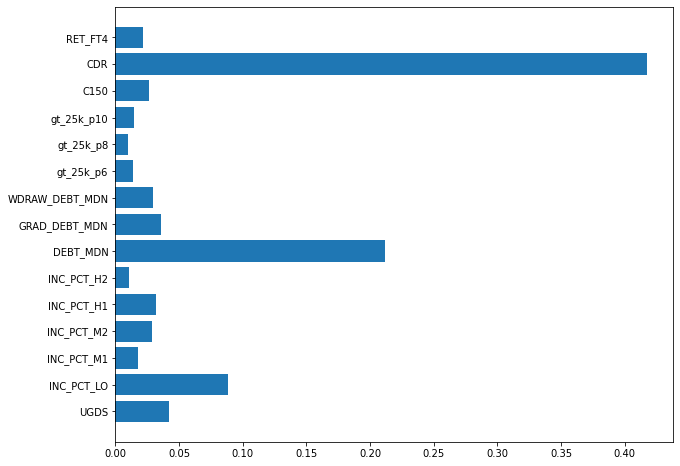

In [126]:
female_firstgen_model_feature_importances = female_firstgen_model.feature_importances_
female_firstgen_model_features = ['UGDS', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'gt_25k_p6', 'gt_25k_p8', 'gt_25k_p10', 'C150', 'CDR', 'RET_FT4']
plt.figure(figsize=(10, 8))
plt.barh(female_firstgen_model_features, female_firstgen_model_feature_importances)

In [127]:
# Making new predictions

# Case 2: A male student wants to get into Harvard who is a not the first gen in his family to attend college. 

X_random2 = target_university_df[target_university_df['University'] == 'Harvard']
X_random2 = X_random2.drop(['University', 'opeid6', 'RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP'], axis=1)
X_random2

,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR
0,7233.2,0.447864,0.209905,0.144978,0.055231,0.142022,6350.0,6000.0,10752.0,0.874359,0.883213,0.881311,0.9743,0.0116,0.975


In [128]:
male_nonfirstgen_model.predict(X_random2)

array([0.85189089])

<BarContainer object of 15 artists>

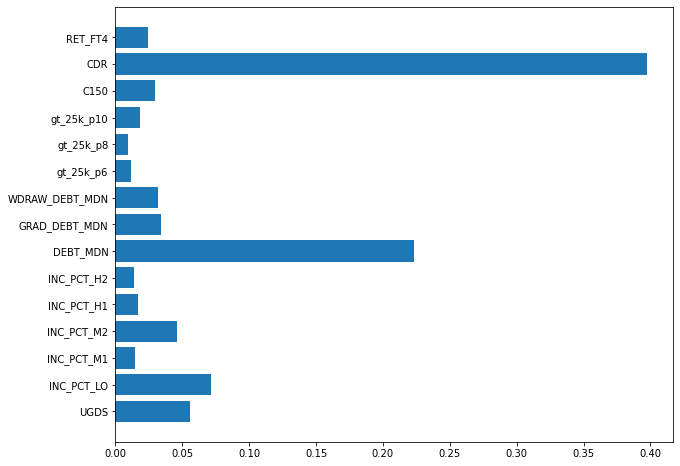

In [129]:
male_nonfirstgen_model_feature_importances = male_nonfirstgen_model.feature_importances_
male_nonfirstgen_model_features = ['UGDS', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'gt_25k_p6', 'gt_25k_p8', 'gt_25k_p10', 'C150', 'CDR', 'RET_FT4']

plt.figure(figsize=(10, 8))
plt.barh(male_nonfirstgen_model_features, male_nonfirstgen_model_feature_importances)

In [130]:
# Making new predictions

# Case 3: A female student wants to get into UPenn who is a not the first gen in her family to attend college. 

X_random3 = target_university_df[target_university_df['University'] == 'UPenn']
X_random3 = X_random3.drop(['University', 'opeid6', 'RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP'], axis=1)
X_random3

,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR
3,10745.8,0.279464,0.136454,0.135663,0.129122,0.319297,18075.0,19326.5,12500.0,0.883165,0.887602,0.887843,0.95592,0.0104,0.97822


In [131]:
female_nonfirstgen_model.predict(X_random3)

array([0.94056942])

<BarContainer object of 15 artists>

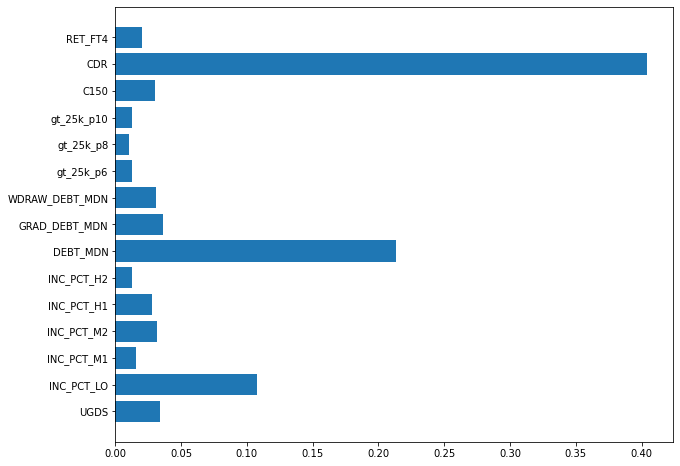

In [132]:
female_nonfirstgen_model_feature_importances = female_nonfirstgen_model.feature_importances_
female_nonfirstgen_model_features = ['UGDS', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'gt_25k_p6', 'gt_25k_p8', 'gt_25k_p10', 'C150', 'CDR', 'RET_FT4']
plt.figure(figsize=(10, 8))
plt.barh(female_nonfirstgen_model_features, female_nonfirstgen_model_feature_importances)

In [133]:
# Making new predictions

# Case 4: A male student wants to get into Yale who is the first gen in her family to attend college. 

X_random4 = target_university_df[target_university_df['University'] == 'Yale']
X_random4 = X_random4.drop(['University', 'opeid6', 'RPY_3YR_RT', 'FEMALE_RPY_3YR_RT_SUPP', 'MALE_RPY_3YR_RT_SUPP', 'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP'], axis=1)
X_random4

,UGDS,INC_PCT_LO,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,RET_FT4,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,gt_25k_p6,gt_25k_p8,gt_25k_p10,C150,CDR
2,5341.2,0.282468,0.186688,0.137987,0.063312,0.233766,9942.4,9545.9,12342.2,0.821836,0.8455,0.857785,0.96964,0.0104,0.98862


In [134]:
male_firstgen_model.predict(X_random4)

array([0.81482723])

<BarContainer object of 15 artists>

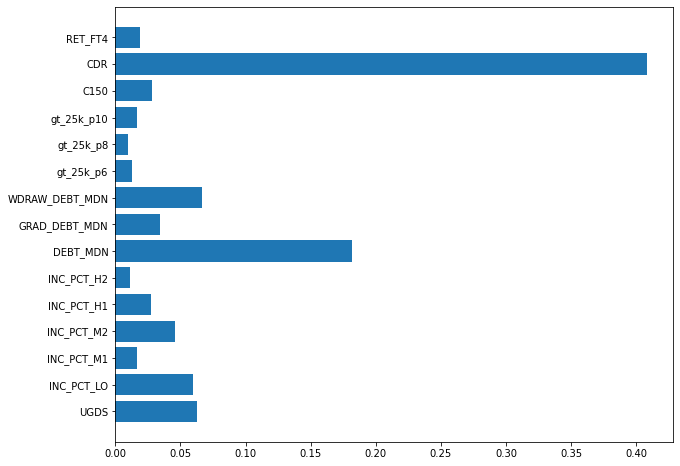

In [135]:
male_firstgen_model_feature_importances = male_firstgen_model.feature_importances_
male_firstgen_model_features = ['UGDS', 'INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'gt_25k_p6', 'gt_25k_p8', 'gt_25k_p10', 'C150', 'CDR', 'RET_FT4']
plt.figure(figsize=(10, 8))
plt.barh(male_firstgen_model_features, male_firstgen_model_feature_importances)

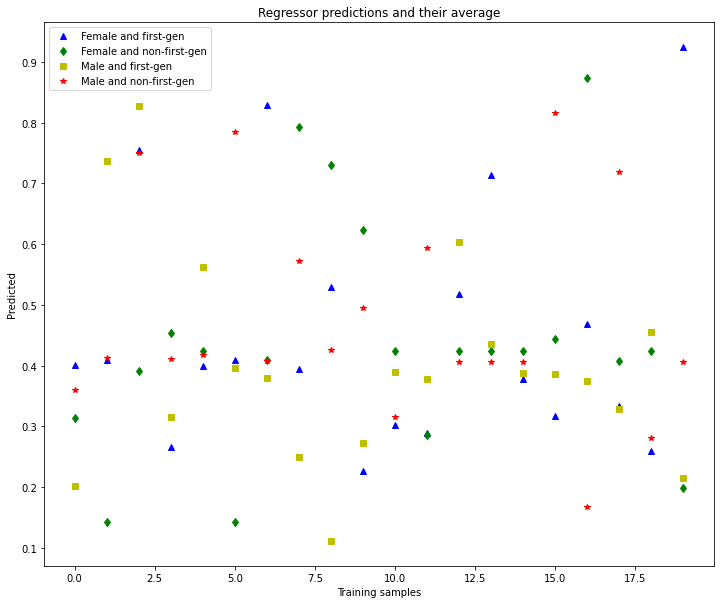

In [136]:
plt.figure(figsize=(12, 10))
plt.plot(female_firstgen_preds[:20], 'b^', label='Female and first-gen')
plt.plot(female_nonfirstgen_preds[:20], 'gd', label='Female and non-first-gen')
plt.plot(male_firstgen_preds[:20], 'ys', label='Male and first-gen')
plt.plot(male_nonfirstgen_preds[:20], 'r*', label='Male and non-first-gen')

plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.ylabel('Predicted')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.savefig('model_viz.png', bbox_inches='tight')

plt.show()